Installing required packages

In [142]:
#!pip install nltk

In [143]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import datetime
import warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',None)
# Import relevant packages

import nltk

import re 

import string
from nltk.tokenize import regexp_tokenize

from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

from nltk.corpus import stopwords  # Remove useless words
from nltk.stem.lancaster import LancasterStemmer  # Convert words to base form; aggressive
nltk.download('punkt')
# Import packages that help us to create document-term matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
%matplotlib inline

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [144]:
df=pd.read_csv('flight_price_prediction(final_dataset_new).csv')
df

,Unnamed: 0,Unnamed: 0.1,Date_recorded,Airline_name,Website,Date_of_journey,Day_of_journey,Departure_time,Arrival_time,Origin,Destination,Stops,Duration,Price
0,0,0,24/01/2022,Vistara,BudgetTicket,23/02/2022,WEDNESDAY,06:30,08:35,BOM Chhatrapati Shivaji Intl,DEL Indira Gandhi Intl,direct,2h 05m,"₹ 1,865"
1,1,1,24/01/2022,Vistara,BudgetTicket,23/02/2022,WEDNESDAY,06:00,08:05,BOM Chhatrapati Shivaji Intl,DEL Indira Gandhi Intl,direct,2h 05m,"₹ 1,865"
2,2,2,24/01/2022,Vistara,BudgetTicket,23/02/2022,WEDNESDAY,20:55,23:00,BOM Chhatrapati Shivaji Intl,DEL Indira Gandhi Intl,direct,2h 05m,"₹ 1,865"
3,3,3,24/01/2022,Vistara,BudgetTicket,23/02/2022,WEDNESDAY,12:25,14:30,BOM Chhatrapati Shivaji Intl,DEL Indira Gandhi Intl,direct,2h 05m,"₹ 1,865"
4,4,4,24/01/2022,Vistara,BudgetTicket,23/02/2022,WEDNESDAY,18:30,20:40,BOM Chhatrapati Shivaji Intl,DEL Indira Gandhi Intl,direct,2h 10m,"₹ 1,865"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7162,2551,2551,27/01/2022,"IndiGo, GoFirst",Kiwi.com,13/02/2022,SUNDAY,06:10,11:00,BLR Bengaluru Intl,PAT Patna,"1 stop,HYD",4h 50m,"₹ 8,462"
7163,2552,2552,27/01/2022,"Vistara, IndiGo",Gotogate,13/02/2022,SUNDAY,07:55,16:10,BLR Bengaluru Intl,PAT Patna,"1 stop,HYD",8h 15m,"₹ 9,059"
7164,2553,2553,27/01/2022,"Air India, GoFirst",Kiwi.com,13/02/2022,SUNDAY,06:30,11:00,BLR Bengaluru Intl,PAT Patna,"1 stop,HYD",4h 30m,"₹ 9,280"
7165,2554,2554,27/01/2022,"IndiGo, SpiceJet",Kiwi.com,13/02/2022,SUNDAY,02:45,10:05,BLR Bengaluru Intl,PAT Patna,"1 stop,AMD",7h 20m,"₹ 11,866"


In [145]:
#dropping the unnamed columns
col=['Unnamed: 0','Unnamed: 0.1']
df.drop(col,axis=1,inplace=True)

EXPLORATORY DATA ANALYSIS

In [146]:
df.nunique()

Date_recorded         3
Airline_name        185
Website              51
Date_of_journey       3
Day_of_journey        3
Departure_time      382
Arrival_time        715
Origin               16
Destination          15
Stops               406
Duration            892
Price              3009
dtype: int64

In [147]:
df.isnull().sum()

Date_recorded      0
Airline_name       0
Website            0
Date_of_journey    0
Day_of_journey     0
Departure_time     0
Arrival_time       0
Origin             0
Destination        0
Stops              0
Duration           0
Price              0
dtype: int64

CHANGING THE DATA TYPES OF THE COLUMNS CONTAINING DATES OR TIME TO DATETIME FORMAT

CONVERTING THE 'Date_of_Journey' COLUMN TO DATE TIME FORMAT AND THEN EXTRACTING THE DAY AND THE HOURS SEPARATELY.

In [148]:
df['date_of_journey']=pd.to_datetime(df['Date_of_journey']).dt.day
df['month_of_journey']=pd.to_datetime(df['Date_of_journey']).dt.month


EXTRACTING THE MINUTES AND HOURS SEPARATELY FROM THE DEPARTURE AND ARRIVAL TIME FEATURES.

In [150]:
df['Dep_hour'] = pd.to_datetime(df['Departure_time'], format='%H:%M').dt.hour
df['Dep_min'] = pd.to_datetime(df['Departure_time'], format='%H:%M').dt.minute

The 'Arrival_time' feature has extra information like the number of days from the date of departure to reach the destination.Hence,it will be dealt later accordingly.

In [152]:
df['Price']=df['Price'].str.replace('₹','')

In [153]:
df['Price']=df['Price'].str.replace(',','')

In [154]:
#Now cleaning 'Duration' feature
df['Duration']=df['Duration'].str.replace('h',':')
df['Duration']=df['Duration'].str.replace('m','')
df['Duration']=df['Duration'].str.replace(' ','')

In [155]:
df.head()

,Date_recorded,Airline_name,Website,Date_of_journey,Day_of_journey,Departure_time,Arrival_time,Origin,Destination,Stops,Duration,Price,date_of_journey,month_of_journey,Dep_hour,Dep_min
0,24/01/2022,Vistara,BudgetTicket,23/02/2022,WEDNESDAY,06:30,08:35,BOM Chhatrapati Shivaji Intl,DEL Indira Gandhi Intl,direct,2:05,1865,23,2,6,30
1,24/01/2022,Vistara,BudgetTicket,23/02/2022,WEDNESDAY,06:00,08:05,BOM Chhatrapati Shivaji Intl,DEL Indira Gandhi Intl,direct,2:05,1865,23,2,6,0
2,24/01/2022,Vistara,BudgetTicket,23/02/2022,WEDNESDAY,20:55,23:00,BOM Chhatrapati Shivaji Intl,DEL Indira Gandhi Intl,direct,2:05,1865,23,2,20,55
3,24/01/2022,Vistara,BudgetTicket,23/02/2022,WEDNESDAY,12:25,14:30,BOM Chhatrapati Shivaji Intl,DEL Indira Gandhi Intl,direct,2:05,1865,23,2,12,25
4,24/01/2022,Vistara,BudgetTicket,23/02/2022,WEDNESDAY,18:30,20:40,BOM Chhatrapati Shivaji Intl,DEL Indira Gandhi Intl,direct,2:10,1865,23,2,18,30


In [156]:
#Cleaning the feature "Arrival_time" and extracting the extra data into a separate feature
days=[]
time_=[]
for i in range(len(df)):
    if('+' in df['Arrival_time'][i]):
        #for j in df['Arrival_time']
        loc_='+'.find(df['Arrival_time'][i])
        days.append(df['Arrival_time'][i][loc_])
        time_.append(df['Arrival_time'][i][:loc_-1])
    else:
        days.append('0')
        time_.append(df['Arrival_time'][i])
print(len(days))
print(len(time_))
        

7167
7167


In [157]:
#Creating separate features for the number of days of the journey and arrival time
df['Time_of_arrival']=time_
df['Days_since_departure']=days

The feature 'Date_recorded' was created so that the booking made in number of days before the journey can be determined which can be used to determine the effect of time on flight prices(eg: last minute purchases).Hence,i am creating a new feature by the name 'Days_to_journey' which will contain the data in the number of days before the day of journey,the booking was made. 

In [158]:
day=pd.to_datetime(df['Date_recorded']).dt.day
month=pd.to_datetime(df['Date_recorded']).dt.month
no_of_days=[]
for i in range(len(df)):
    
    if(month[i]==df['month_of_journey'][i]):
        no=df['date_of_journey'][i]-day[i]
        no_of_days.append(no)
        #print(i)
    else:
        diff_month=df['month_of_journey'][i]-month[i]
        if(diff_month==1):
            no=(31-day[i])+df['date_of_journey'][i]
            no_of_days.append(no)
            #print(no)
print(len(no_of_days))
        
    



7167


In [159]:
df['Days_to_journey']=no_of_days

In [160]:
df

,Date_recorded,Airline_name,Website,Date_of_journey,Day_of_journey,Departure_time,Arrival_time,Origin,Destination,Stops,Duration,Price,date_of_journey,month_of_journey,Dep_hour,Dep_min,Time_of_arrival,Days_since_departure,Days_to_journey
0,24/01/2022,Vistara,BudgetTicket,23/02/2022,WEDNESDAY,06:30,08:35,BOM Chhatrapati Shivaji Intl,DEL Indira Gandhi Intl,direct,2:05,1865,23,2,6,30,08:35,0,30
1,24/01/2022,Vistara,BudgetTicket,23/02/2022,WEDNESDAY,06:00,08:05,BOM Chhatrapati Shivaji Intl,DEL Indira Gandhi Intl,direct,2:05,1865,23,2,6,0,08:05,0,30
2,24/01/2022,Vistara,BudgetTicket,23/02/2022,WEDNESDAY,20:55,23:00,BOM Chhatrapati Shivaji Intl,DEL Indira Gandhi Intl,direct,2:05,1865,23,2,20,55,23:00,0,30
3,24/01/2022,Vistara,BudgetTicket,23/02/2022,WEDNESDAY,12:25,14:30,BOM Chhatrapati Shivaji Intl,DEL Indira Gandhi Intl,direct,2:05,1865,23,2,12,25,14:30,0,30
4,24/01/2022,Vistara,BudgetTicket,23/02/2022,WEDNESDAY,18:30,20:40,BOM Chhatrapati Shivaji Intl,DEL Indira Gandhi Intl,direct,2:10,1865,23,2,18,30,20:40,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7162,27/01/2022,"IndiGo, GoFirst",Kiwi.com,13/02/2022,SUNDAY,06:10,11:00,BLR Bengaluru Intl,PAT Patna,"1 stop,HYD",4:50,8462,13,2,6,10,11:00,0,17
7163,27/01/2022,"Vistara, IndiGo",Gotogate,13/02/2022,SUNDAY,07:55,16:10,BLR Bengaluru Intl,PAT Patna,"1 stop,HYD",8:15,9059,13,2,7,55,16:10,0,17
7164,27/01/2022,"Air India, GoFirst",Kiwi.com,13/02/2022,SUNDAY,06:30,11:00,BLR Bengaluru Intl,PAT Patna,"1 stop,HYD",4:30,9280,13,2,6,30,11:00,0,17
7165,27/01/2022,"IndiGo, SpiceJet",Kiwi.com,13/02/2022,SUNDAY,02:45,10:05,BLR Bengaluru Intl,PAT Patna,"1 stop,AMD",7:20,11866,13,2,2,45,10:05,0,17


OUR DATASET HAS 7,167 ROWS AND 19 COLUMNS

In [161]:
#extracting the unique airport code and city names from the origin and destination columns into a separate features
origin_code=[]
origin_city=[]
destination_code=[]
destination_city=[]
for i in range(len(df)):
    split1=df['Origin'][i].split(" ",1)
    split2=df['Destination'][i].split(" ",1)
    origin_code.append(split1[0])
    origin_city.append(split1[1])
    destination_code.append(split2[0])
    destination_city.append(split2[1])
print(len(origin_code))
print(len(origin_city))
print(len(destination_code))
print(len(destination_city))


7167
7167
7167
7167


In [162]:
#Creating features for the scraped information
df['origin_code']=origin_code
df['origin_city']=origin_city
df['destination_code']=destination_code
df['destination_city']=destination_city
df

,Date_recorded,Airline_name,Website,Date_of_journey,Day_of_journey,Departure_time,Arrival_time,Origin,Destination,Stops,Duration,Price,date_of_journey,month_of_journey,Dep_hour,Dep_min,Time_of_arrival,Days_since_departure,Days_to_journey,origin_code,origin_city,destination_code,destination_city
0,24/01/2022,Vistara,BudgetTicket,23/02/2022,WEDNESDAY,06:30,08:35,BOM Chhatrapati Shivaji Intl,DEL Indira Gandhi Intl,direct,2:05,1865,23,2,6,30,08:35,0,30,BOM,Chhatrapati Shivaji Intl,DEL,Indira Gandhi Intl
1,24/01/2022,Vistara,BudgetTicket,23/02/2022,WEDNESDAY,06:00,08:05,BOM Chhatrapati Shivaji Intl,DEL Indira Gandhi Intl,direct,2:05,1865,23,2,6,0,08:05,0,30,BOM,Chhatrapati Shivaji Intl,DEL,Indira Gandhi Intl
2,24/01/2022,Vistara,BudgetTicket,23/02/2022,WEDNESDAY,20:55,23:00,BOM Chhatrapati Shivaji Intl,DEL Indira Gandhi Intl,direct,2:05,1865,23,2,20,55,23:00,0,30,BOM,Chhatrapati Shivaji Intl,DEL,Indira Gandhi Intl
3,24/01/2022,Vistara,BudgetTicket,23/02/2022,WEDNESDAY,12:25,14:30,BOM Chhatrapati Shivaji Intl,DEL Indira Gandhi Intl,direct,2:05,1865,23,2,12,25,14:30,0,30,BOM,Chhatrapati Shivaji Intl,DEL,Indira Gandhi Intl
4,24/01/2022,Vistara,BudgetTicket,23/02/2022,WEDNESDAY,18:30,20:40,BOM Chhatrapati Shivaji Intl,DEL Indira Gandhi Intl,direct,2:10,1865,23,2,18,30,20:40,0,30,BOM,Chhatrapati Shivaji Intl,DEL,Indira Gandhi Intl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7162,27/01/2022,"IndiGo, GoFirst",Kiwi.com,13/02/2022,SUNDAY,06:10,11:00,BLR Bengaluru Intl,PAT Patna,"1 stop,HYD",4:50,8462,13,2,6,10,11:00,0,17,BLR,Bengaluru Intl,PAT,Patna
7163,27/01/2022,"Vistara, IndiGo",Gotogate,13/02/2022,SUNDAY,07:55,16:10,BLR Bengaluru Intl,PAT Patna,"1 stop,HYD",8:15,9059,13,2,7,55,16:10,0,17,BLR,Bengaluru Intl,PAT,Patna
7164,27/01/2022,"Air India, GoFirst",Kiwi.com,13/02/2022,SUNDAY,06:30,11:00,BLR Bengaluru Intl,PAT Patna,"1 stop,HYD",4:30,9280,13,2,6,30,11:00,0,17,BLR,Bengaluru Intl,PAT,Patna
7165,27/01/2022,"IndiGo, SpiceJet",Kiwi.com,13/02/2022,SUNDAY,02:45,10:05,BLR Bengaluru Intl,PAT Patna,"1 stop,AMD",7:20,11866,13,2,2,45,10:05,0,17,BLR,Bengaluru Intl,PAT,Patna


In [163]:
#Now extracting the route feature and cleaning the 'Stops' feature
stops=[]
route=[]
for i in range(len(df)):
    
    if(df['Stops'][i]=='direct'):
        stops.append('0')
        route_=df['origin_code'][i]+'-'+df['destination_code'][i]
        route.append(route_)
    else:
       # print(':here')
        split=df['Stops'][i].split(",")
        #print(split)
        if(len(split)==2):
            route_=df['origin_code'][i]+'-'+split[1] +'-'+df['destination_code'][i]
        elif(len(split)==3):   
            df['origin_code'][i]+'-'+split[1]+'-'+split[2]+'-'+df['destination_code'][i]
        elif(len(split)==4):
                route_=df['origin_code'][i]+'-'+split[1]+'-'+split[2]+'-'+split[3]+'-'+df['destination_code'][i]
        route.append(route_)
        stops.append(df['Stops'][i][0])
print(len(stops))
print(len(route))
    

7167
7167


In [164]:
#creating separate features for the flight route and the number of stops
df['route']=route
df['stops']=stops

In [166]:
#Changing time of arrival in to separate features of hours and minutes(same as of departure)
df['arrival_hour']=pd.to_datetime(df['Time_of_arrival']).dt.hour
df['arrival_min']=pd.to_datetime(df['Time_of_arrival']).dt.minute



In [167]:
#Separating the hours and minutes of journey into separate columns
duration_hours=[]
duration_minutes=[]
for i in range(len(df)):
    split=df['Duration'][i].split(":")
    duration_hours.append(split[0])
    duration_minutes.append(split[1])
print(len(duration_hours))
print(len(duration_minutes))



7167
7167


In [168]:
df['duration_hours']=duration_hours
df['duration_minutes']=duration_minutes

Dropping the parent columns from which the necessary information has been extracted/separated.

In [170]:
drop_list=['Date_recorded','Date_of_journey','Departure_time','Arrival_time','Origin','Destination','Duration','Stops','Time_of_arrival']
df.drop(drop_list,axis=1,inplace=True)

In [171]:

df.head()

,Airline_name,Website,Day_of_journey,Price,date_of_journey,month_of_journey,Dep_hour,Dep_min,Days_since_departure,Days_to_journey,origin_code,origin_city,destination_code,destination_city,route,stops,arrival_hour,arrival_min,duration_hours,duration_minutes
0,Vistara,BudgetTicket,WEDNESDAY,1865,23,2,6,30,0,30,BOM,Chhatrapati Shivaji Intl,DEL,Indira Gandhi Intl,BOM-DEL,0,8,35,2,05
1,Vistara,BudgetTicket,WEDNESDAY,1865,23,2,6,0,0,30,BOM,Chhatrapati Shivaji Intl,DEL,Indira Gandhi Intl,BOM-DEL,0,8,5,2,05
2,Vistara,BudgetTicket,WEDNESDAY,1865,23,2,20,55,0,30,BOM,Chhatrapati Shivaji Intl,DEL,Indira Gandhi Intl,BOM-DEL,0,23,0,2,05
3,Vistara,BudgetTicket,WEDNESDAY,1865,23,2,12,25,0,30,BOM,Chhatrapati Shivaji Intl,DEL,Indira Gandhi Intl,BOM-DEL,0,14,30,2,05
4,Vistara,BudgetTicket,WEDNESDAY,1865,23,2,18,30,0,30,BOM,Chhatrapati Shivaji Intl,DEL,Indira Gandhi Intl,BOM-DEL,0,20,40,2,10


In [172]:
df.dtypes

Airline_name            object
Website                 object
Day_of_journey          object
Price                   object
date_of_journey          int64
month_of_journey         int64
Dep_hour                 int64
Dep_min                  int64
Days_since_departure    object
Days_to_journey          int64
origin_code             object
origin_city             object
destination_code        object
destination_city        object
route                   object
stops                   object
arrival_hour             int64
arrival_min              int64
duration_hours          object
duration_minutes        object
dtype: object

Now changing the datatypes of the integer type columns,present in object data type.

In [173]:
#The 'Price' feature contains some of the values present as'Info'.This will create problems in changing its datatype to integer.Hence,dropping the rows having those values from the dataframe
np.where(df['Price']=='Info')

(array([1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097,
        1098, 2275, 2276, 2277, 2278, 2279, 2280, 2281, 2282, 3402, 3403,
        3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 4410, 4411,
        4412, 4413, 4414, 4415, 4416, 4417, 6885, 6886, 6887, 6888, 6889,
        6890, 6891, 6892], dtype=int64),)

In [174]:
drop_rows=[1087, 1088, 1089, 1090, 1091, 1092, 1093, 1094, 1095, 1096, 1097,
        1098, 2275, 2276, 2277, 2278, 2279, 2280, 2281, 2282, 3402, 3403,
        3404, 3405, 3406, 3407, 3408, 3409, 3410, 3411, 3412, 4410, 4411,
        4412, 4413, 4414, 4415, 4416, 4417, 6885, 6886, 6887, 6888, 6889,
        6890, 6891, 6892]
df.drop(drop_rows,inplace=True)

In [175]:
int_list=['Price','Days_since_departure','stops','duration_hours','duration_minutes']

for i in int_list:
    df[i]=df[i].str.replace(" ",'')#removing all the blank spaces
    df[i]=df[i].astype('int64')
    print(i)

Price
Days_since_departure
stops
duration_hours
duration_minutes


In [176]:
df.dtypes

Airline_name            object
Website                 object
Day_of_journey          object
Price                    int64
date_of_journey          int64
month_of_journey         int64
Dep_hour                 int64
Dep_min                  int64
Days_since_departure     int64
Days_to_journey          int64
origin_code             object
origin_city             object
destination_code        object
destination_city        object
route                   object
stops                    int64
arrival_hour             int64
arrival_min              int64
duration_hours           int64
duration_minutes         int64
dtype: object

PROCEEDING TO VISUALIZATION

<AxesSubplot:>

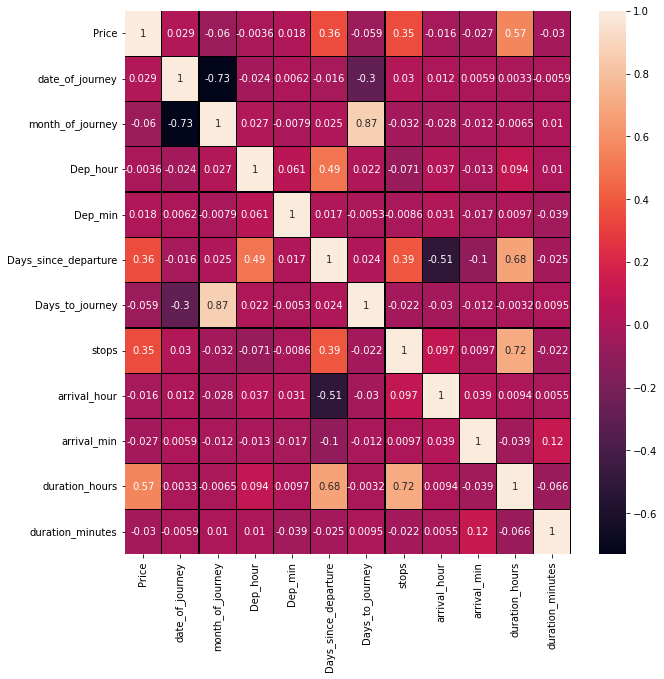

In [177]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,linewidths=0.25,linecolor='black')

The features 'duration_hours' shows signs of collinearity with columns :'Days_since_departure' and 'stops'.However,the correlation is not very strong. 
The feature 'date_of_journey' has a very strong negative correlation with 'days_to_journey' and 'month_of_journey'.Dropping this feature.

In [178]:
df.drop('date_of_journey',axis=1,inplace=True)

Determing the relations/trends of the independant features with the target feature(Price) through visualisation.

In [179]:
df.head()

,Airline_name,Website,Day_of_journey,Price,month_of_journey,Dep_hour,Dep_min,Days_since_departure,Days_to_journey,origin_code,origin_city,destination_code,destination_city,route,stops,arrival_hour,arrival_min,duration_hours,duration_minutes
0,Vistara,BudgetTicket,WEDNESDAY,1865,2,6,30,0,30,BOM,Chhatrapati Shivaji Intl,DEL,Indira Gandhi Intl,BOM-DEL,0,8,35,2,5
1,Vistara,BudgetTicket,WEDNESDAY,1865,2,6,0,0,30,BOM,Chhatrapati Shivaji Intl,DEL,Indira Gandhi Intl,BOM-DEL,0,8,5,2,5
2,Vistara,BudgetTicket,WEDNESDAY,1865,2,20,55,0,30,BOM,Chhatrapati Shivaji Intl,DEL,Indira Gandhi Intl,BOM-DEL,0,23,0,2,5
3,Vistara,BudgetTicket,WEDNESDAY,1865,2,12,25,0,30,BOM,Chhatrapati Shivaji Intl,DEL,Indira Gandhi Intl,BOM-DEL,0,14,30,2,5
4,Vistara,BudgetTicket,WEDNESDAY,1865,2,18,30,0,30,BOM,Chhatrapati Shivaji Intl,DEL,Indira Gandhi Intl,BOM-DEL,0,20,40,2,10


Airline_name vs Price 

In [180]:
#Filtering the indivisual airlines from the multi-airlines just for visualisation purpose
visualize=[]
for i in df['Airline_name']:
    if(',' not in i):
        visualize.append(i)
    else:
        visualize.append('multi airlines')
len(visualize)
            
        

7120

The feature 'Visualize_airline' was used instead of the 'Airline_name' column later in the project as it was found more potentially contributing.

In [181]:
#Creating a feature just for visualization
df['Visualize_airline']=visualize

<Figure size 720x720 with 0 Axes>

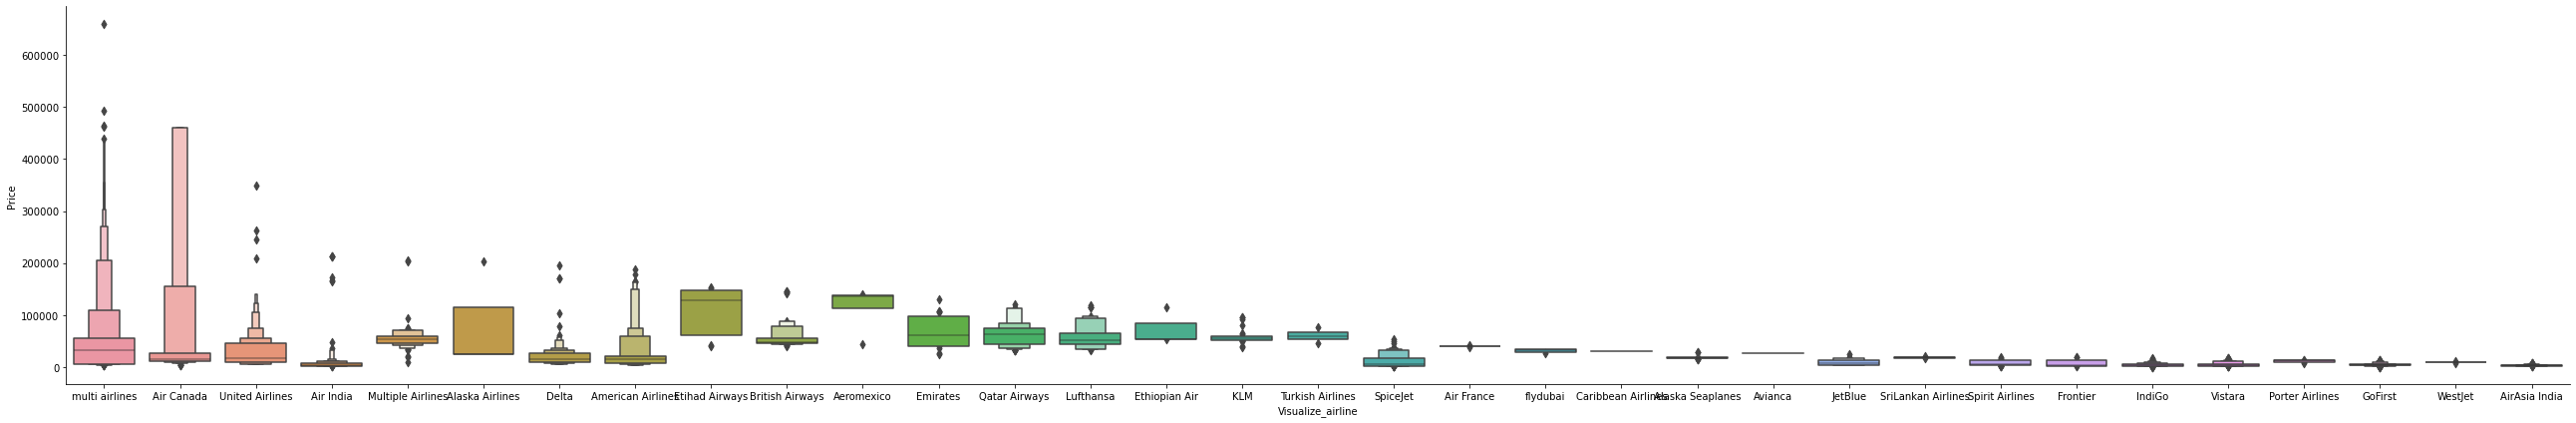

In [182]:
# Airline vs Price
plt.figure(figsize=(10,10))
sns.catplot(y = "Price", x = "Visualize_airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 6)
plt.show()


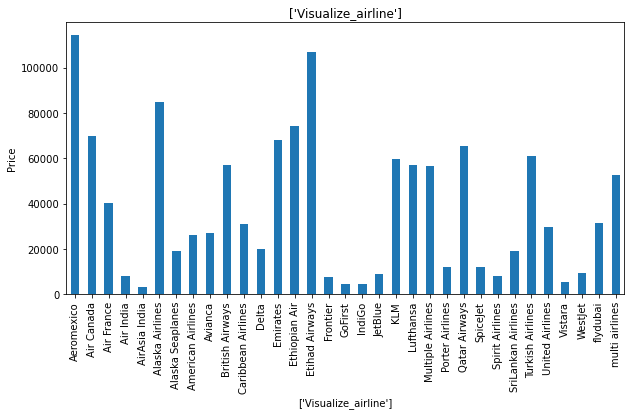

In [332]:
plt.figure(figsize=(10,5))
df.groupby(['Visualize_airline'])['Price'].mean().plot.bar()
plt.xlabel(['Visualize_airline'])
plt.ylabel('Price')
plt.title(['Visualize_airline'])
plt.show()


In [184]:
print(max(df['Price']))
print(min(df['Price']))
df[df['Price']==660190]

660190
660


,Airline_name,Website,Day_of_journey,Price,month_of_journey,Dep_hour,Dep_min,Days_since_departure,Days_to_journey,origin_code,origin_city,destination_code,destination_city,route,stops,arrival_hour,arrival_min,duration_hours,duration_minutes,Visualize_airline
755,"Emirates, Air Canada",Bravofly,WEDNESDAY,660190,2,18,25,1,30,CPT,Cape Town Intl,YYZ,Pearson Intl,CPT-LHR-YYZ,2,19,43,32,18,multi airlines


In [185]:
df[df['Price']==660]

,Airline_name,Website,Day_of_journey,Price,month_of_journey,Dep_hour,Dep_min,Days_since_departure,Days_to_journey,origin_code,origin_city,destination_code,destination_city,route,stops,arrival_hour,arrival_min,duration_hours,duration_minutes,Visualize_airline
2376,IndiGo,happyfares,WEDNESDAY,660,2,19,25,0,29,AMD,Ahmedabad,BOM,Chhatrapati Shivaji Intl,AMD-BOM,0,20,35,1,10,IndiGo
2377,IndiGo,happyfares,WEDNESDAY,660,2,22,0,0,29,AMD,Ahmedabad,BOM,Chhatrapati Shivaji Intl,AMD-BOM,0,23,25,1,25,IndiGo
2378,IndiGo,happyfares,WEDNESDAY,660,2,6,50,0,29,AMD,Ahmedabad,BOM,Chhatrapati Shivaji Intl,AMD-BOM,0,8,25,1,35,IndiGo


OBSERVATIONS:

    1)'Etihad Airways' has the highest mean Price followed by 'Aeromexico' in this sample.
    2)'AirAsia India' has the lowest mean Price.
    3)The mostly domestic airlines like 'Vistara','Indigo',''GoFirst','Frontier','AirAsia India' have the lowest mean Prices in       this sample.
    4)The Arab('Etihad,Qatar Airways) and the western Airlines(Aeromexico,AirCanada,British Airways) have the highest mean           SalePrices in this sample.
    5)The highest recorded Price(Rs 6,60,190) was from MuliAirlines journey jointly by Emirates and AirCanada flying from Cape Town Intl. to       Pearson Intl. 
    6)The lowest recorded Price(Rs 660) was by Indigo flights travelling from Ahmedabad to Chhatrapati Shivaji Intl(Mumbai) airport.
    

Website Vs Price


In [186]:
#Filtering the indivisual websites from the multi-websites just for visualisation purpose
visualize=[]
for i in df['Website']:
    if('sites' not in i):
        visualize.append(i)
    else:
        visualize.append('multi-Websites')
len(visualize)
            
        

7120

In [187]:
df['Visualize_websites']=visualize

<Figure size 720x720 with 0 Axes>

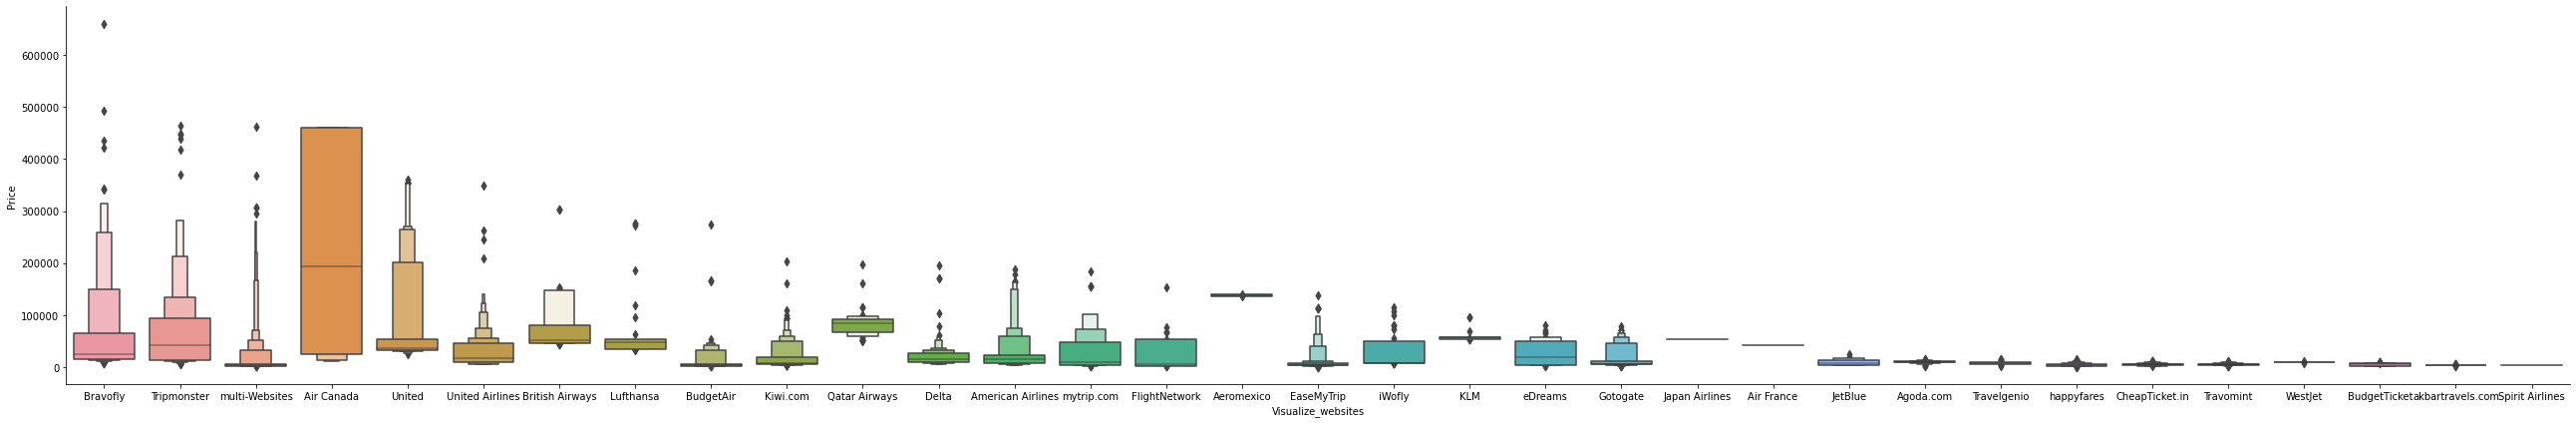

In [188]:
# Website vs Price
plt.figure(figsize=(10,10))
sns.catplot(y = "Price", x = "Visualize_websites", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 6)
plt.show()

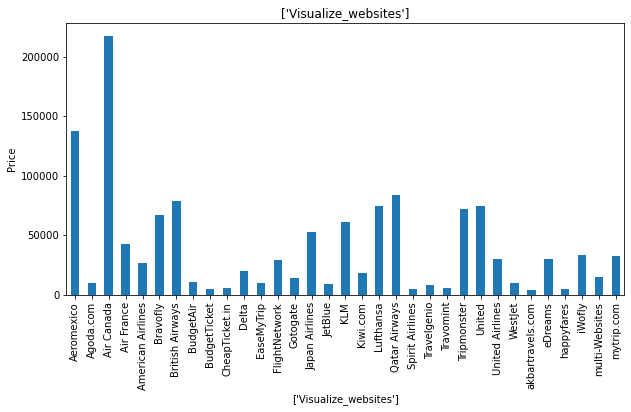

In [333]:
plt.figure(figsize=(10,5))
df.groupby(['Visualize_websites'])['Price'].mean().plot.bar()
plt.xlabel(['Visualize_websites'])
plt.ylabel('Price')
plt.title(['Visualize_websites'])
plt.show()


OBSERVATIONS:

    1)The websites: Agoda.com,CheapTicket.in,BudgetTicket,Spirit Airlines,akbartravels.com,happyfares,Travomint have the lowest       mean prices amongst all the websites.
    2)The AirCanada,Aeromexico and the Qatar Airways have the highest mean Price.  
    3)The highest price in the sample was from 'Bravofly' and the lowest from 'happyfares'.

Day_of_journey Vs Price

<Figure size 720x720 with 0 Axes>

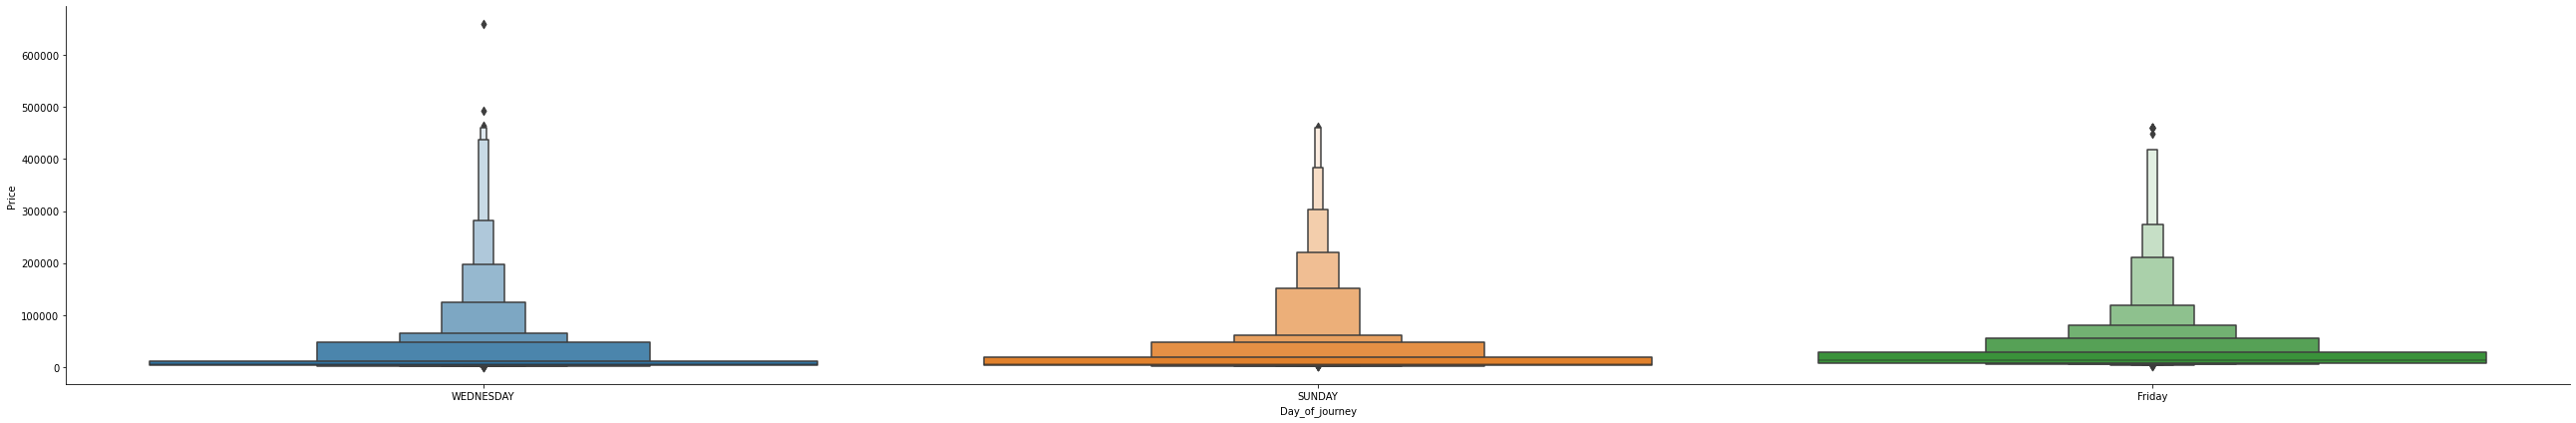

In [190]:
# Website vs Price
plt.figure(figsize=(10,10))
sns.catplot(y = "Price", x = "Day_of_journey", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 6)
plt.show()

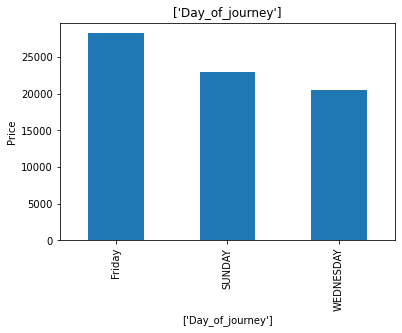

In [191]:
df.groupby(['Day_of_journey'])['Price'].mean().plot.bar()
plt.xlabel(['Day_of_journey'])
plt.ylabel('Price')
plt.title(['Day_of_journey'])
plt.show()


OBSERVATIONS:
           Flights leaving on Friday had a higher mean Price than the ones leaving on Wednesday or Sunday.Although they can be probably              due to the fact that the ones leaving on friday were closer to the booking date.
    

Month_of_journey VS Price

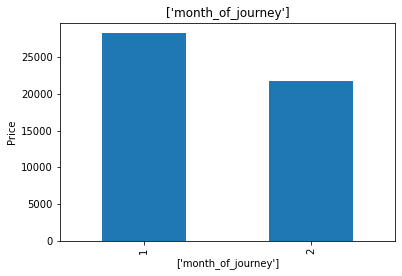

In [192]:
df.groupby(['month_of_journey'])['Price'].mean().plot.bar()
plt.xlabel(['month_of_journey'])
plt.ylabel('Price')
plt.title(['month_of_journey'])
plt.show()


OBSERVATION:
     
        The flights departing in january have a higher mean of prices than those departing in Feb. 

Dep_hour VS Price

<Figure size 720x720 with 0 Axes>

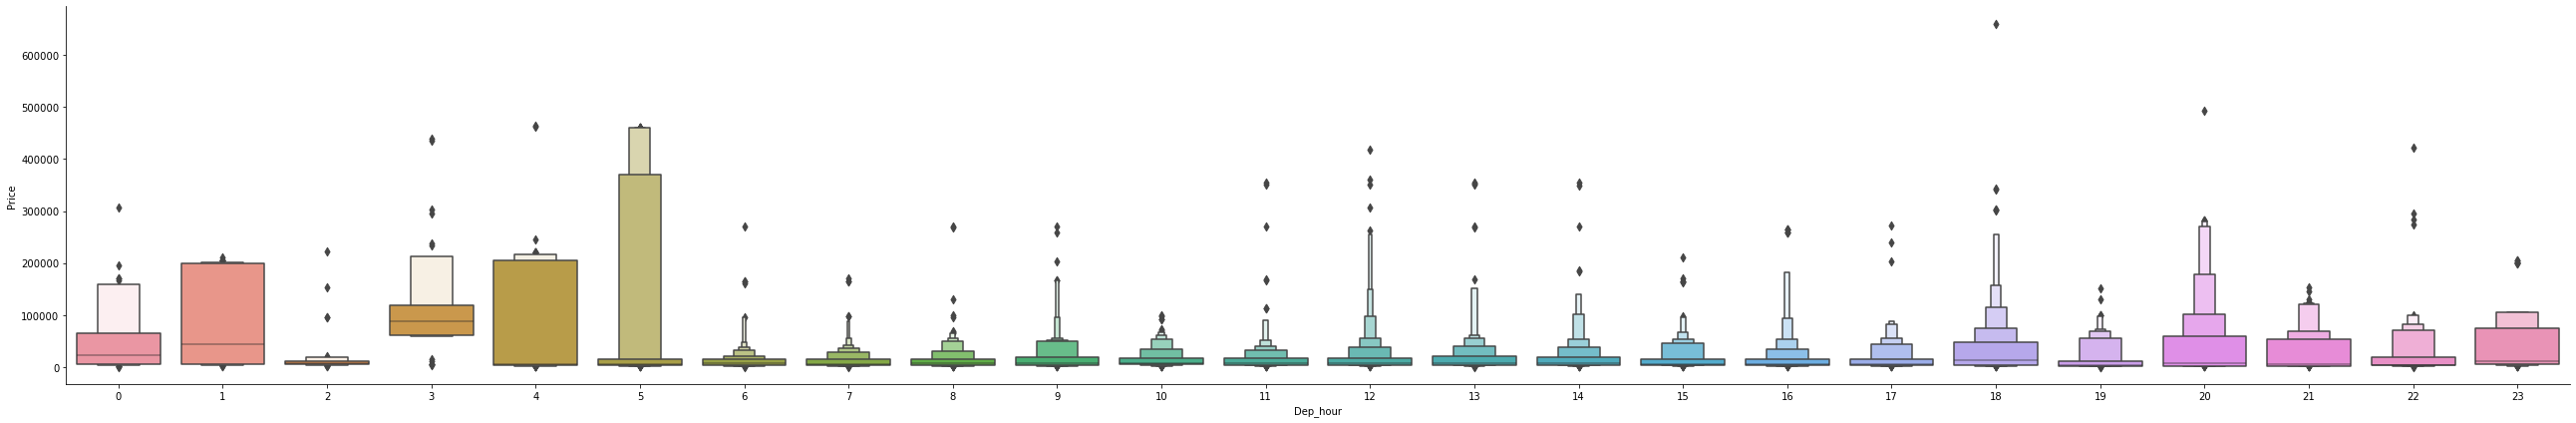

In [193]:
# hour of departure vs price
plt.figure(figsize=(10,10))
sns.catplot(y = "Price", x = "Dep_hour", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 6)
plt.show()

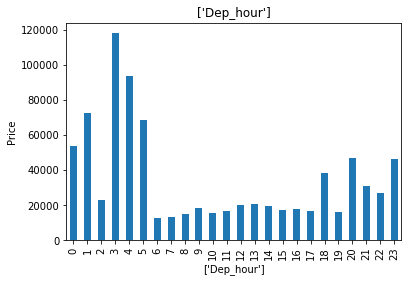

In [194]:
df.groupby(['Dep_hour'])['Price'].mean().plot.bar()
plt.xlabel(['Dep_hour'])
plt.ylabel('Price')
plt.title(['Dep_hour'])
plt.show()


OBSERVATIONS:
    
        1)The early morning flights(departing at:3,4,5am.) have the highest mean of prices with the ones departing at 3am being           the costliest.
        2)The morning flights(departing at: 6,7 and 8am) have the lowest mean of prices with the ones departing at 6am. being             the cheapest.
        3)The highest ticket fare in this sample however,was of a flight departing at 6pm.

Days_since_departure VS Price


<Figure size 720x720 with 0 Axes>

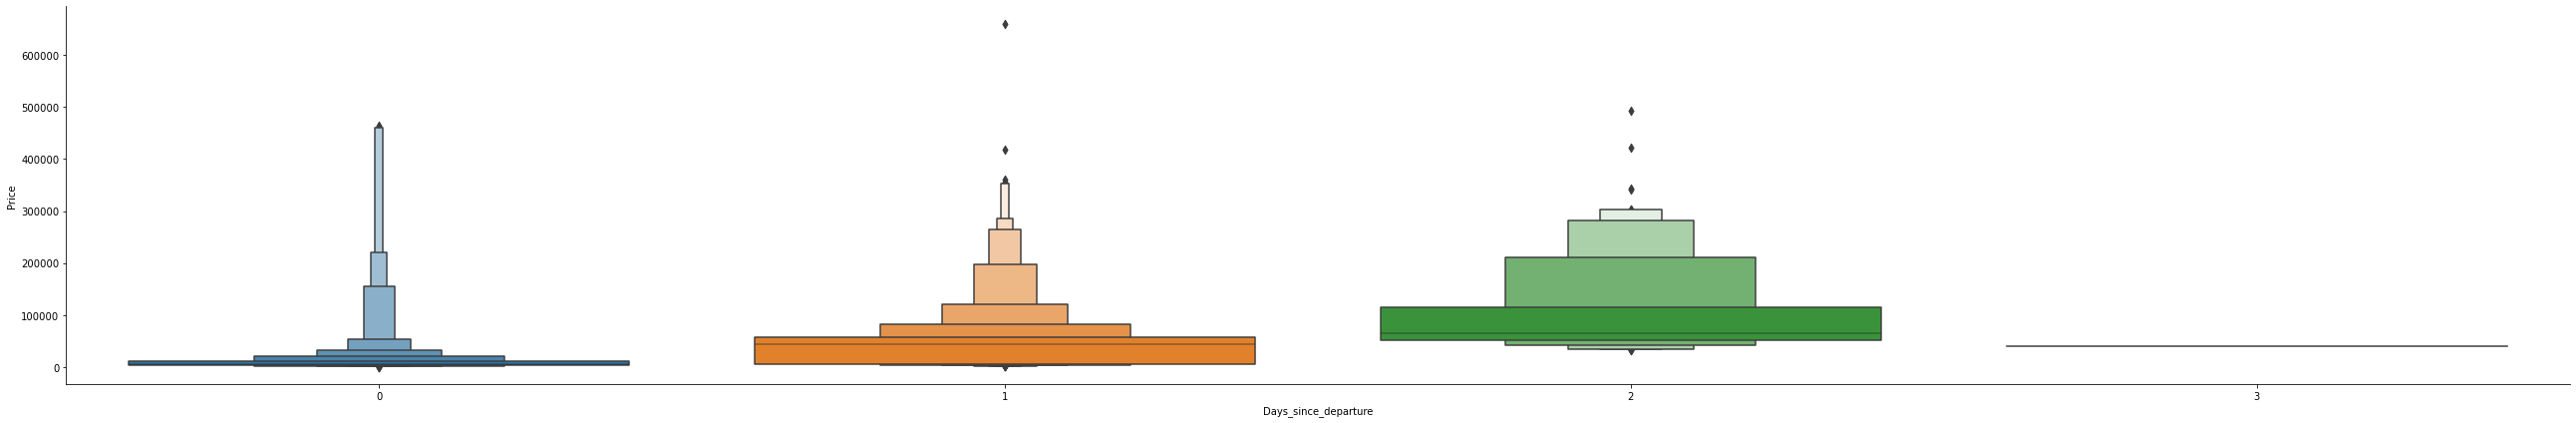

In [195]:
#Number of days travelled since departure vs price
plt.figure(figsize=(10,10))
sns.catplot(y = "Price", x = "Days_since_departure", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 6)
plt.show()

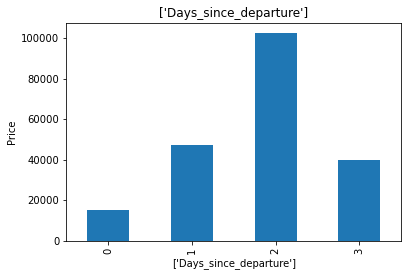

In [196]:
df.groupby(['Days_since_departure'])['Price'].mean().plot.bar()
plt.xlabel(['Days_since_departure'])
plt.ylabel('Price')
plt.title(['Days_since_departure'])
plt.show()


OBSERVATIONS:

    1)The flights taking 2 days to reach destination have the highest mean of ticket prices.
    2)The flights arriving to their destinations on the same day they depart,have the lowest mean of ticket prices.
    3)The costliest ticket price in this sample was of a flight taking 1 day to reach its destination airport.

Days_to_journey VS Price

<Figure size 720x720 with 0 Axes>

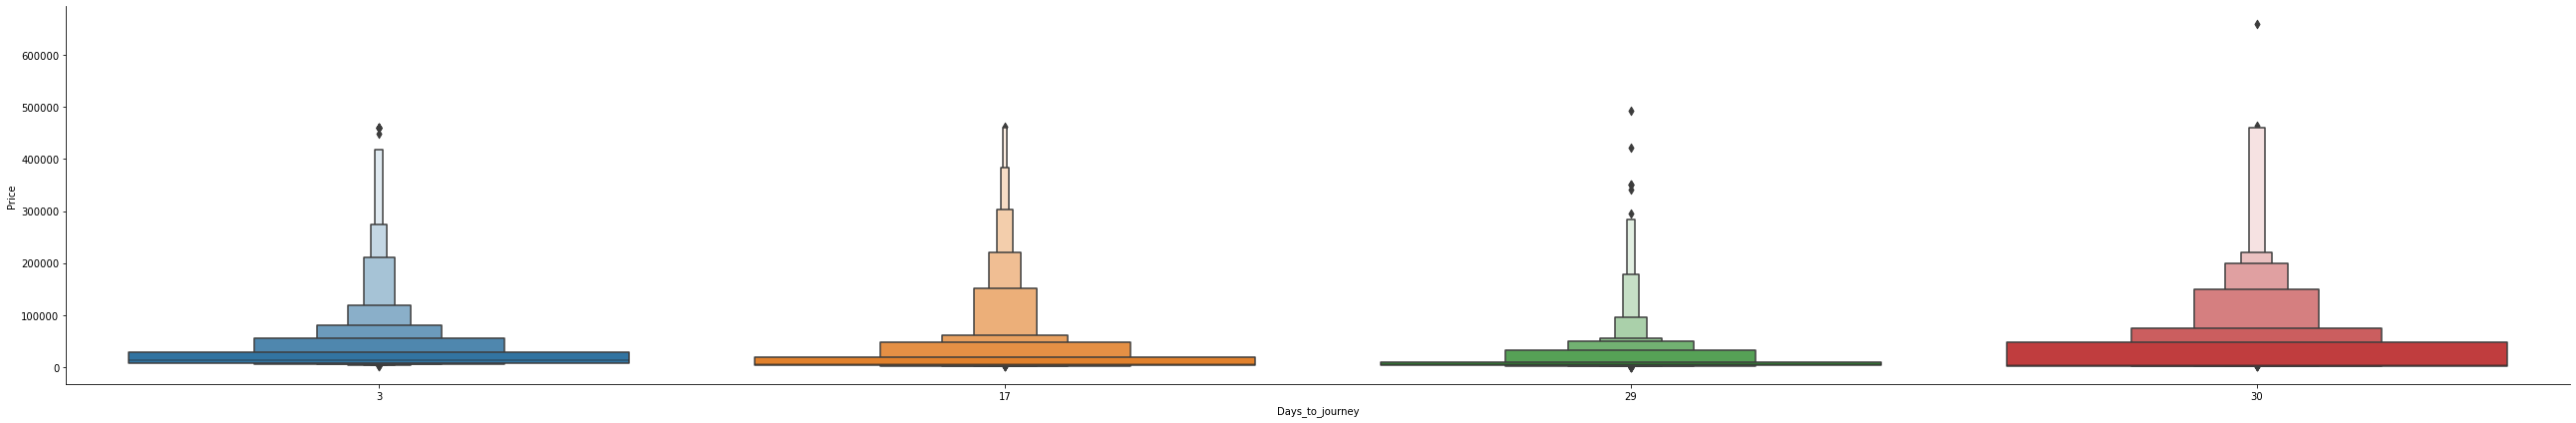

In [197]:
#The 'Days to journey' feature vs price will show the relationship between varations in ticket prices with the number of days the booking is made before the flight.
plt.figure(figsize=(10,10))
sns.catplot(y = "Price", x = "Days_to_journey", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 6)
plt.show()

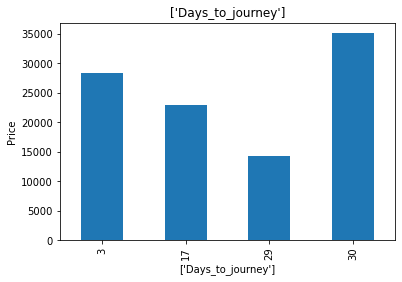

In [198]:
df.groupby(['Days_to_journey'])['Price'].mean().plot.bar()
plt.xlabel(['Days_to_journey'])
plt.ylabel('Price')
plt.title(['Days_to_journey'])
plt.show()


OBSERVATIONS:
    1)Contrary to the popular belief, the flights booked 30 days prior to the journey had the highest average of ticket prices.
    2)A downward trend is present with the increasing number of days if we leave the '30' out.
    3)The highest recorded ticket price in this sample was also booked 30 days prior to the flight.
    

Origin_city VS Price

<Figure size 720x720 with 0 Axes>

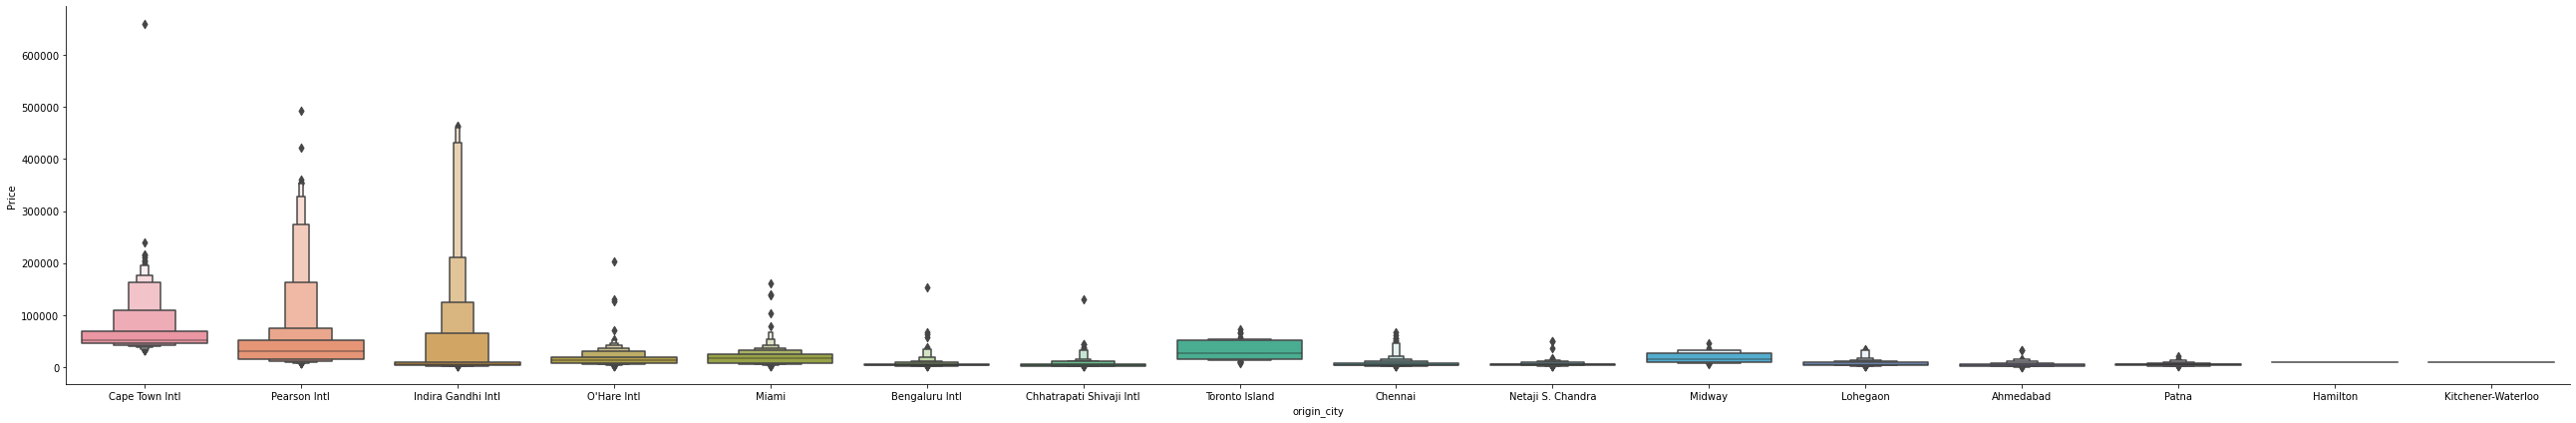

In [199]:
#origin_city vs price
plt.figure(figsize=(10,10))
sns.catplot(y = "Price", x = "origin_city", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 6)
plt.show()

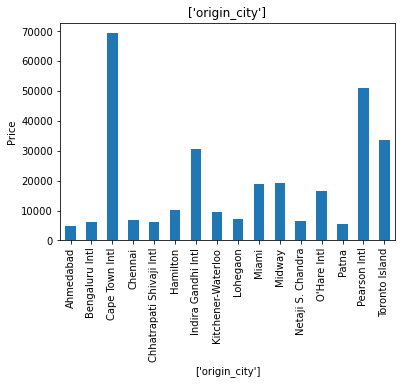

In [200]:
df.groupby(['origin_city'])['Price'].mean().plot.bar()
plt.xlabel(['origin_city'])
plt.ylabel('Price')
plt.title(['origin_city'])
plt.show()


OBSERVATIONS:
    1)The flights originating from 'Cape Town Intl' had the costliest airfares(averaged.) and indivisual.
    2)The flights originating from 'Ahmedabad' had the cheapest(average.) aswell as indivisual ticket prices.
    

Destination city VS Price

<Figure size 720x720 with 0 Axes>

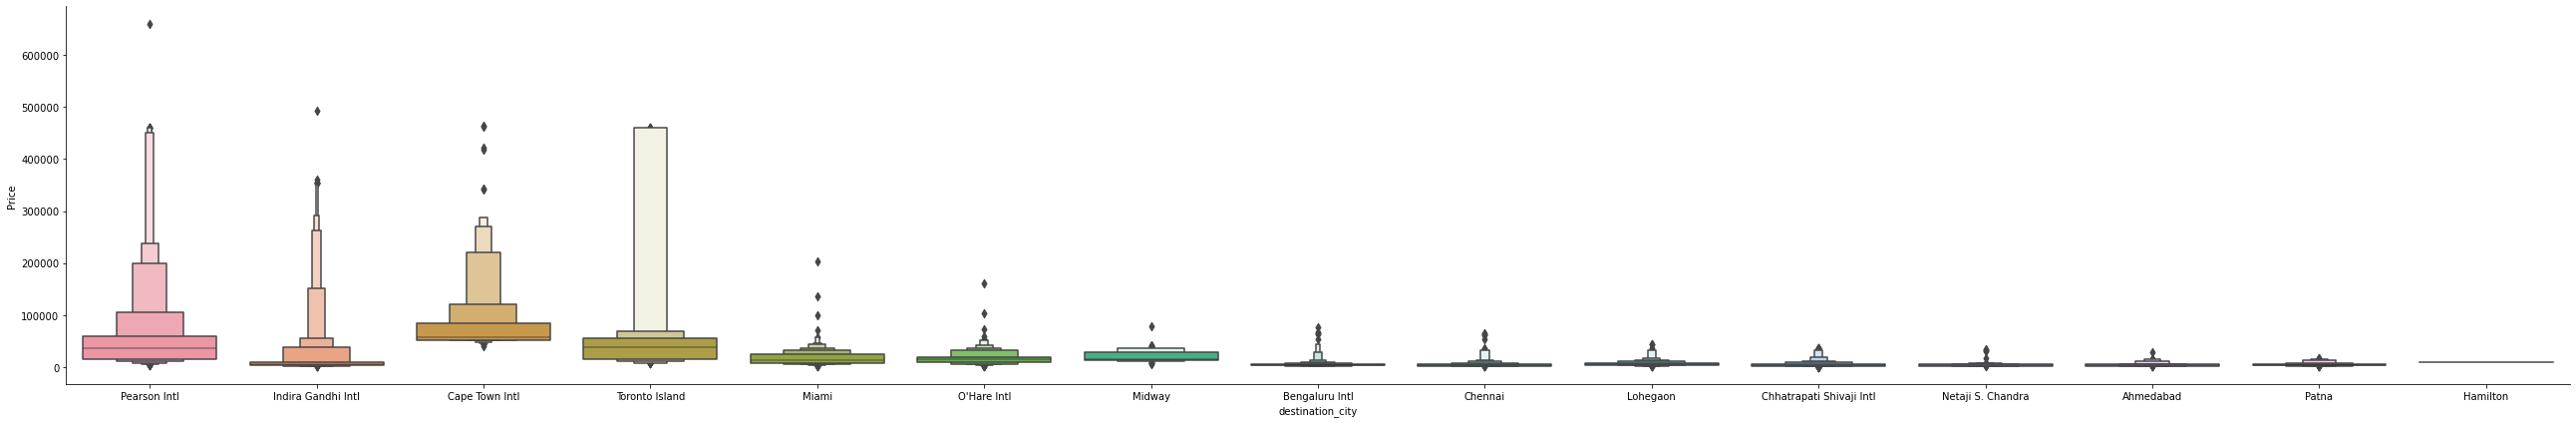

In [201]:
#Destination_city vs price
plt.figure(figsize=(10,10))
sns.catplot(y = "Price", x = "destination_city", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 6)
plt.show()

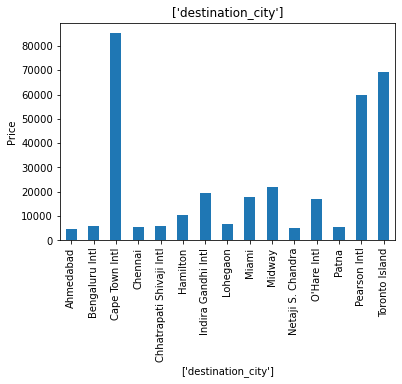

In [202]:
df.groupby(['destination_city'])['Price'].mean().plot.bar()
plt.xlabel(['destination_city'])
plt.ylabel('Price')
plt.title(['destination_city'])
plt.show()


OBSERVATIONS:

    1)The flights flying to 'Cape Town Intl' has the highest(average) Price.
    2)The flights flying to 'ahmedabad' has the lowest(average) ticket price.
    3)The costiliest ticket in this sample is of a flight flying to 'Pearson Intl' airoprt(Toronto).
    4)The cheapest ticket in this sample is of 3 flights flying to Chatrapati shivaji Intl.(Mumbai). 

Stops VS Price

<Figure size 720x720 with 0 Axes>

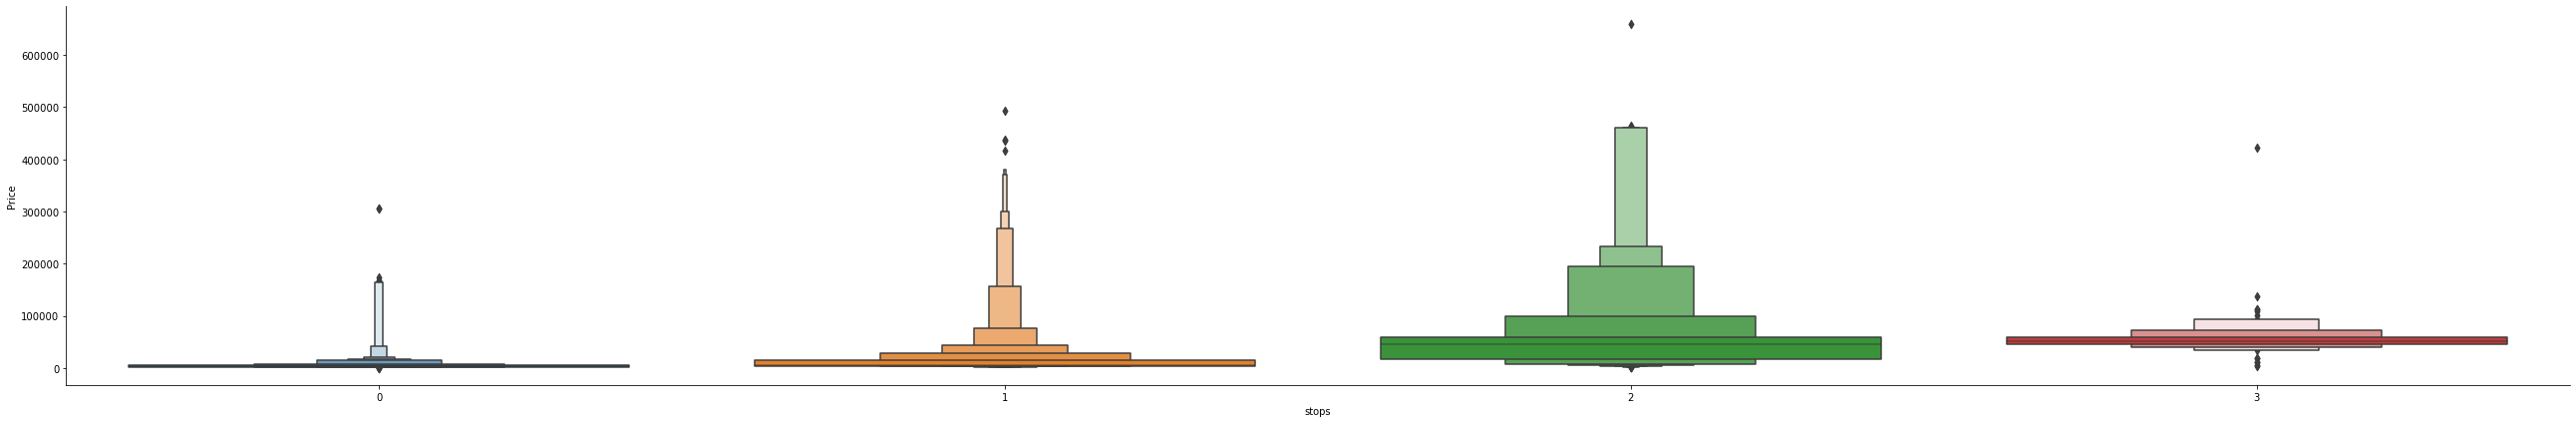

In [203]:
#Number of stops vs price
plt.figure(figsize=(10,10))
sns.catplot(y = "Price", x = "stops", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 6)
plt.show()

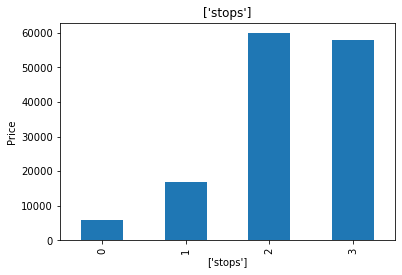

In [204]:
df.groupby(['stops'])['Price'].mean().plot.bar()
plt.xlabel(['stops'])
plt.ylabel('Price')
plt.title(['stops'])
plt.show()


OBSERVATIONS:

    1)The flights having to 2stops in their routes have the highest ticket prices(both average and extreme) closely followed by the ones having 3stops. 
    2)The direct flights have the cheapest airfares.

Arrival_hour VS Price

<Figure size 720x720 with 0 Axes>

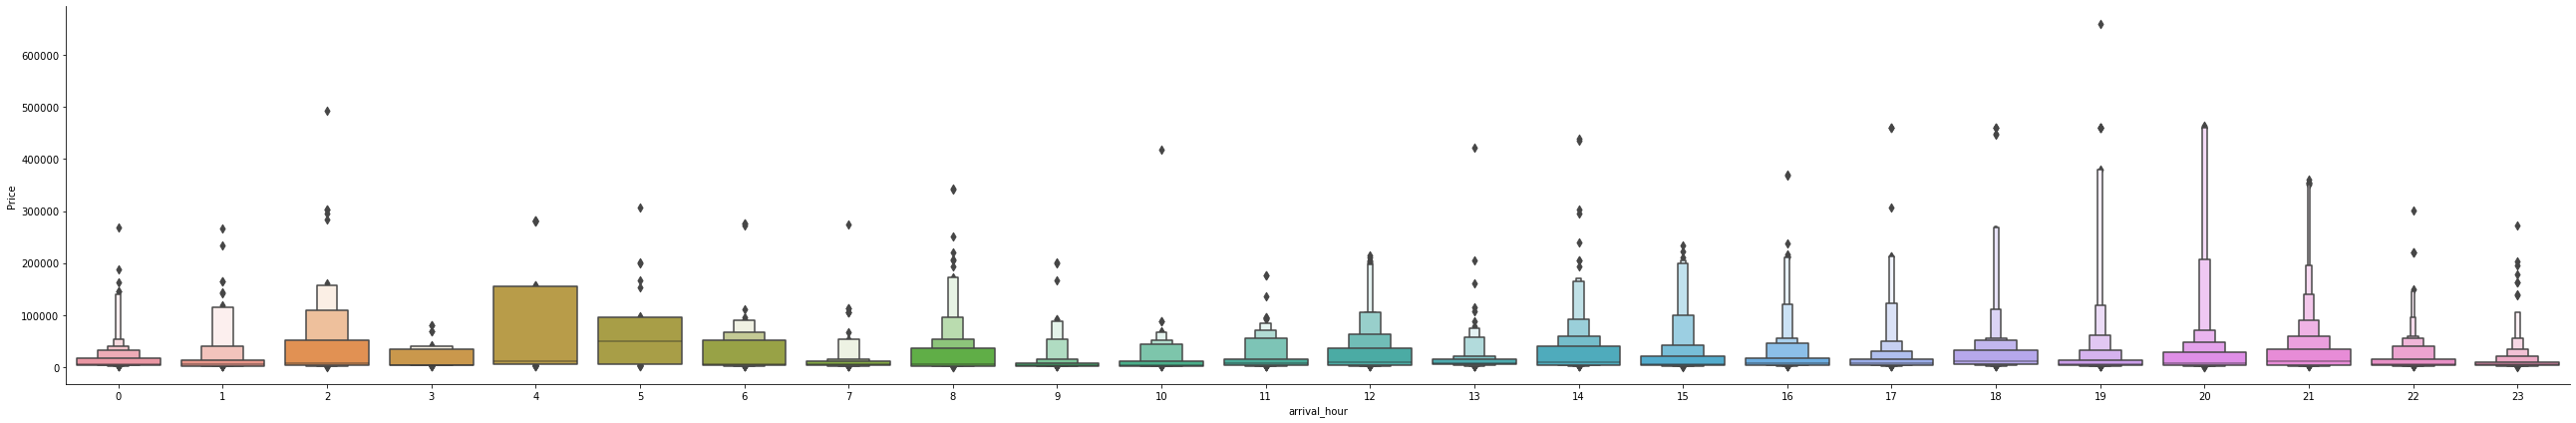

In [205]:
#Number of stops vs price
plt.figure(figsize=(10,10))
sns.catplot(y = "Price", x = "arrival_hour", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 6)
plt.show()

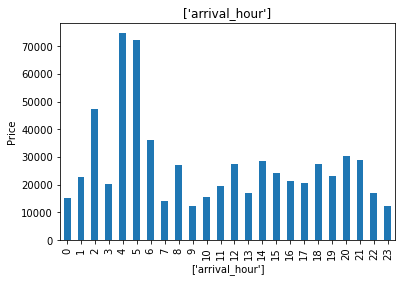

In [206]:
df.groupby(['arrival_hour'])['Price'].mean().plot.bar()
plt.xlabel(['arrival_hour'])
plt.ylabel('Price')
plt.title(['arrival_hour'])
plt.show()

OBSERVATIONS:

    1)The flights arriving at 4 and 5am. have the highest ticket prices(mean).
    2)The flights arriving at 9am and 11pm. have the lowest ticket prices(mean).
    3)The costliest flight in this sample has an arrival time of 7pm(IST).
    4)The cheapest flights in this sample have an arrival time of 8am,8pm and 11pm respectively.

Duration hour VS Price

<Figure size 720x720 with 0 Axes>

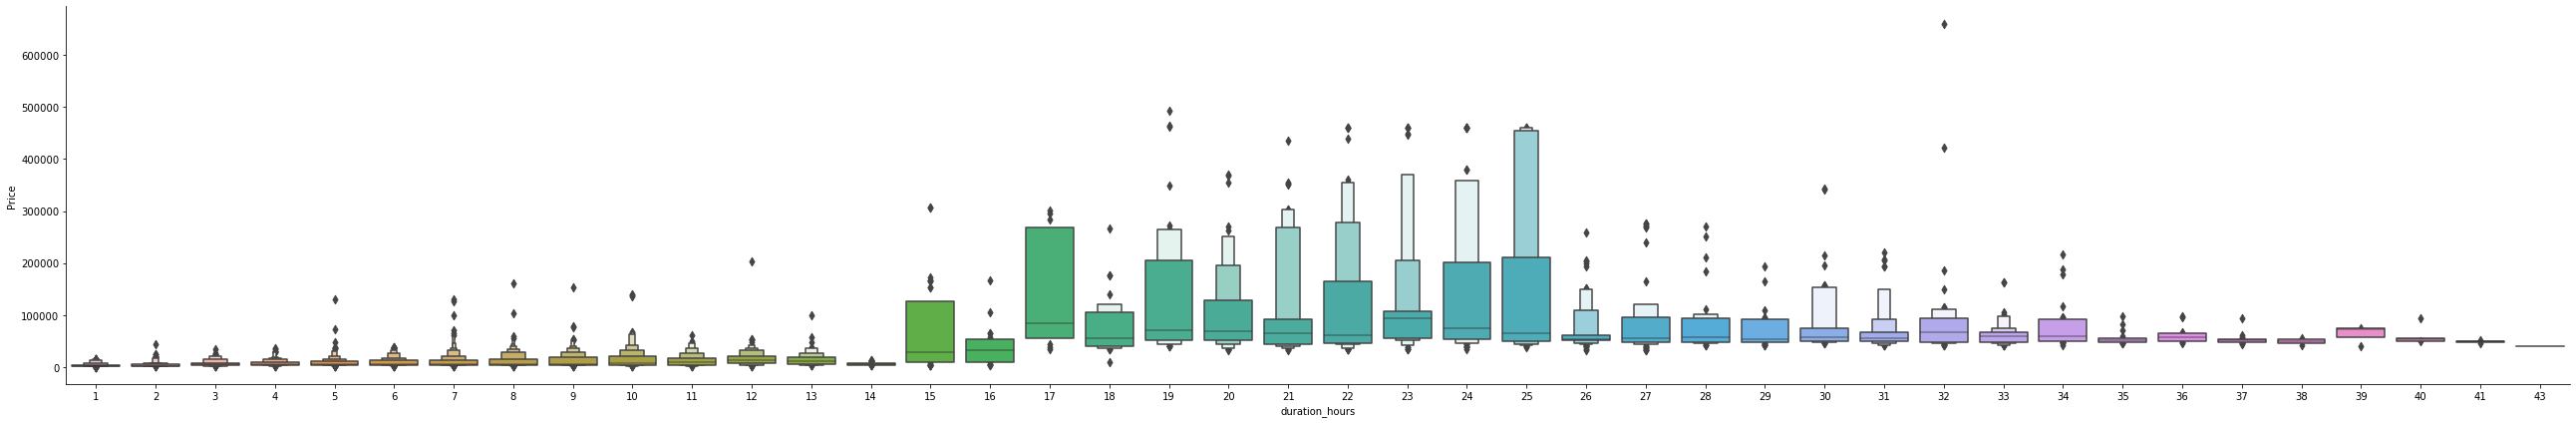

In [207]:
#Number of stops vs price
plt.figure(figsize=(10,10))
sns.catplot(y = "Price", x = "duration_hours", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 6)
plt.show()

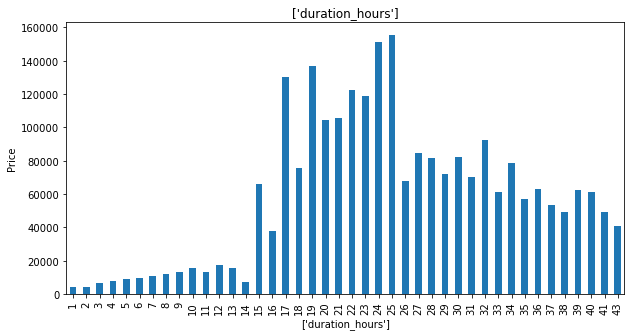

In [208]:
plt.figure(figsize=(10,5))
df.groupby(['duration_hours'])['Price'].mean().plot.bar()
plt.xlabel(['duration_hours'])
plt.ylabel('Price')
plt.title(['duration_hours'])
plt.show()

OBSERVATIONS:

    1)The flights having a travel time of 25 and 24 hours(respectively) have the highest mean of ticket prices.
    2)The flights having a travel time of 1,2,14 hours have the lowest mean of ticket prices.
    3)An upward trend of price is present from duration hours 1 to 10.
    4)The costliest ticket in this sample is of a flight having a travel time of 32 hours.
    5)The cheapest ticket in this sample is of 3 flights having a travel time of 1 hour(respectively).

Checking for outliers in the continous data

Price


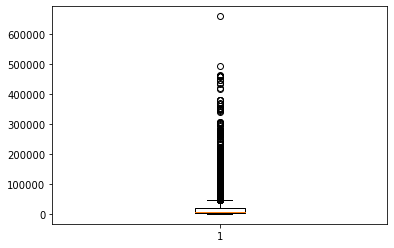

month_of_journey


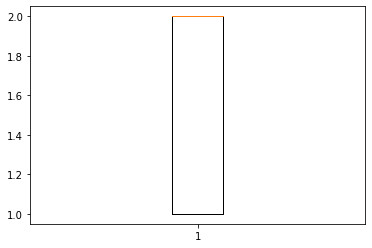

Dep_hour


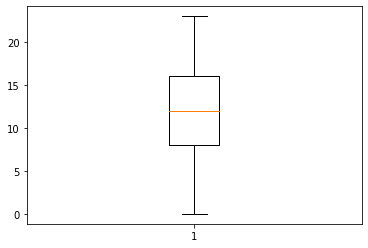

Dep_min


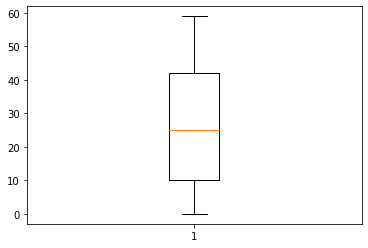

Days_since_departure


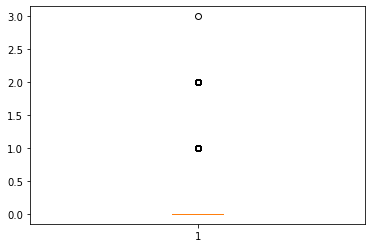

Days_to_journey


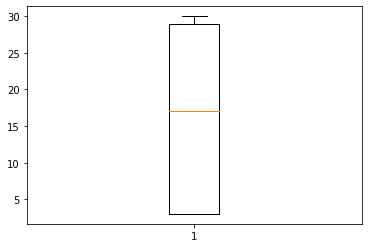

stops


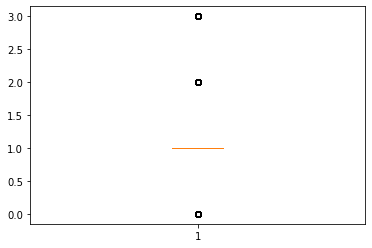

arrival_hour


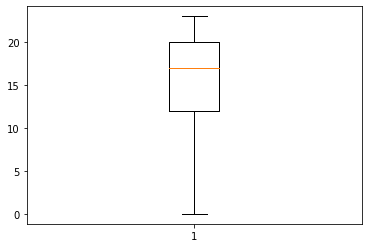

arrival_min


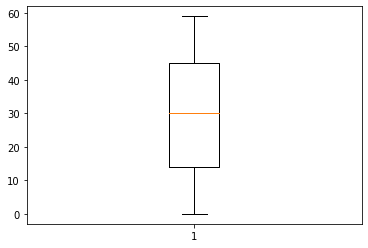

duration_hours


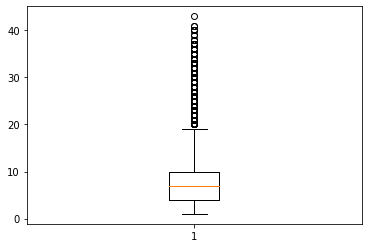

duration_minutes


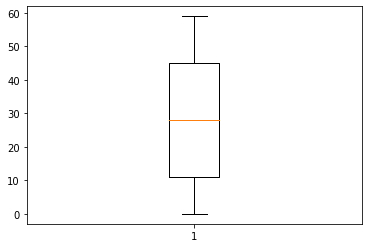

In [209]:
for i in df.columns:
    if(df[i].dtypes=='int64'):
        plt.boxplot(df[i])
        print(i)
        plt.show()

OBSERVATION:
    Presence of outliers was detected in the 'Price' and 'Days since Departure' feature.Removing them using zscore from scipy library.

In [210]:
from scipy.stats import zscore
cont=[]
for i in df.columns:
    if(df[i].dtypes=='int64'):
        cont.append(i)
print(cont)

['Price', 'month_of_journey', 'Dep_hour', 'Dep_min', 'Days_since_departure', 'Days_to_journey', 'stops', 'arrival_hour', 'arrival_min', 'duration_hours', 'duration_minutes']


In [211]:
cont.pop(4)
cont.pop(5)
z=np.abs(zscore(df[cont]))
print(cont)

['Price', 'month_of_journey', 'Dep_hour', 'Dep_min', 'Days_to_journey', 'arrival_hour', 'arrival_min', 'duration_hours', 'duration_minutes']


In [212]:
threshold=3
df_new=df[(z<3).all(axis=1)]
#df_new=df

In [213]:
#Calculating the percentage of data loss
print("Data lost due to removal of outliers is:",(len(df)-len(df_new))/len(df)*100,"%")
#df_new.reset_index()

Data lost due to removal of outliers is: 3.342696629213483 %


In [214]:

df_new=df_new.reset_index(drop=True)

OBSERVATION:
    Outliers(unusual data) in the target variable(Price) and 'Duration_hours' features were detected.They were removed using zscore and 3.43% of data was lost. 

Checking for skewness

Price


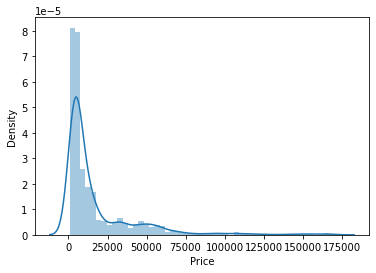

month_of_journey


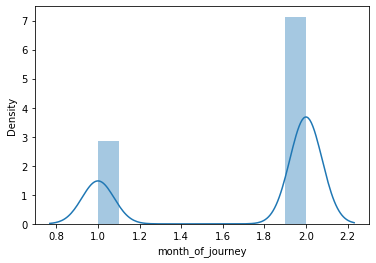

Dep_hour


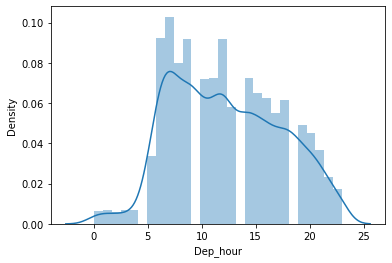

Dep_min


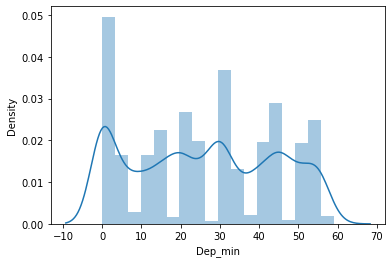

Days_since_departure


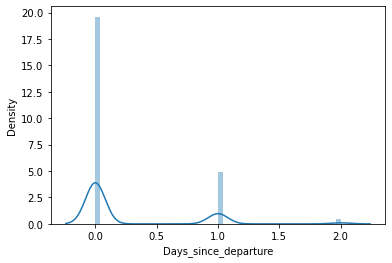

Days_to_journey


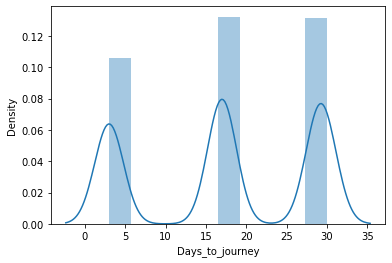

stops


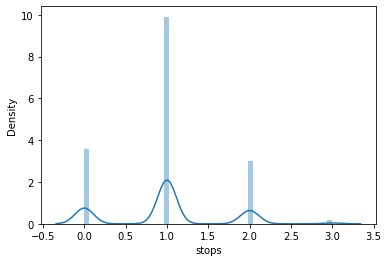

arrival_hour


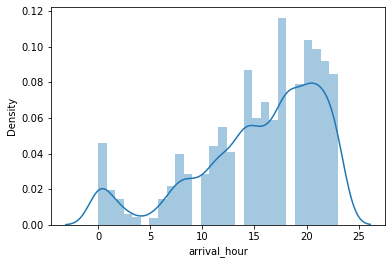

arrival_min


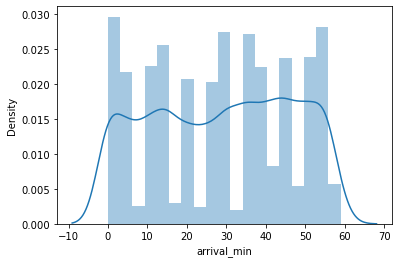

duration_hours


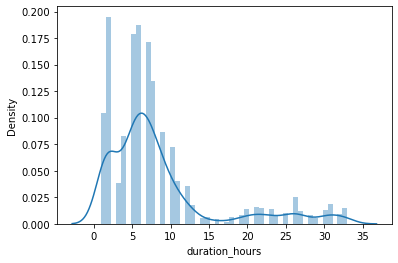

duration_minutes


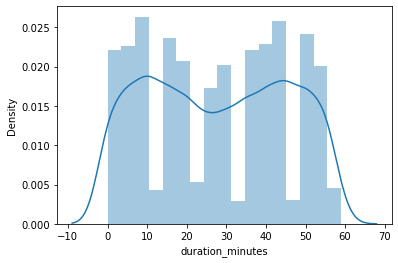

In [215]:
for i in df_new.columns:
    if(df_new[i].dtypes=='int64'):
        sns.distplot(df_new[i])
        print(i)
        plt.show()

In [216]:
df_new.skew()

Price                   2.960356
month_of_journey       -0.943606
Dep_hour                0.176941
Dep_min                 0.042817
Days_since_departure    1.812997
Days_to_journey        -0.210938
stops                   0.249781
arrival_hour           -0.945658
arrival_min            -0.083077
duration_hours          1.760289
duration_minutes        0.013015
dtype: float64

Using log transformation to remove skewness from the 'Price' and "duration_hours" features.

In [217]:
df_new['Price']=np.log(df_new['Price'])


In [218]:
df_new['duration_hours']=np.log(df_new['Price'])

In [219]:
#After removing skewness
df_new.skew()

Price                   0.616880
month_of_journey       -0.943606
Dep_hour                0.176941
Dep_min                 0.042817
Days_since_departure    1.812997
Days_to_journey        -0.210938
stops                   0.249781
arrival_hour           -0.945658
arrival_min            -0.083077
duration_hours          0.421226
duration_minutes        0.013015
dtype: float64

Proceeding to Encoding the categorical data

This is an alternate approach which wasn't used due to certain limitations of 'pd.get_dummies'.The dummies for the airlines however,were created although OneHotEncoder from sklearn.preprocessing was used.

In [220]:
#Creating dummies(One-hot Encoding) for Airline_name feature
airline=df_new['Airline_name'].str.replace(" ","")
airline=pd.get_dummies(airline)
airline

,Aeromexico,AirAsiaIndia,"AirAsiaIndia,GoFirst","AirAsiaIndia,IndiGo","AirAsiaIndia,SpiceJet","AirAsiaIndia,Vistara",AirCanada,"AirCanada,Bahamasair","AirCanada,BritishAirways","AirCanada,FlixBus","AirCanada,Frontier","AirCanada,KenyaAirways","AirCanada,Lufthansa","AirCanada,PorterAirlines","AirCanada,QatarAirways","AirCanada,SWISS","AirCanada,SpiritAirlines",AirFrance,"AirFrance,KLM",AirIndia,"AirIndia,AirAsiaIndia","AirIndia,GoFirst","AirIndia,IndiGo","AirIndia,SpiceJet","AirIndia,Vistara","Airlink,AirCanada","Airlink,Emirates","Airlink,Lufthansa","Airlink,QatarAirways",AlaskaAirlines,AlaskaSeaplanes,"AlaskaSeaplanes,SpiceJet",AmericanAirlines,Avianca,BritishAirways,"BritishAirways,AirCanada","BritishAirways,AirFrance","BritishAirways,AirTransat","BritishAirways,AmericanAirlines","BritishAirways,KLM","BritishAirways,Lufthansa","BritishAirways,QatarAirways","BritishAirways,UnitedAirlines",CaribbeanAirlines,"Cemair,BritishAirways",Delta,"Delta,KLM",Emirates,"Emirates,AirIndia","Emirates,Cemair","Emirates,SpiceJet","Emirates,Vistara","Emirates,flydubai",EthiopianAir,"EthiopianAir,IndiGo","EthiopianAir,Lufthansa","EthiopianAir,flydubai",EtihadAirways,"FlairAirlines,SpiritAirlines","FlySafair,AirCanada","FlySafair,AirFrance","FlySafair,Emirates","FlySafair,EthiopianAir","FlySafair,QatarAirways",Frontier,"Frontier,AirCanada","Frontier,AirTransat","Frontier,CapeAir","Frontier,PorterAirlines","Frontier,SpiritAirlines",GoFirst,"GoFirst,AirAsiaIndia","GoFirst,AirIndia","GoFirst,IndiGo","GoFirst,SpiceJet","GoFirst,Vistara",IndiGo,"IndiGo,AirAsiaIndia","IndiGo,AirIndia","IndiGo,Emirates","IndiGo,GoFirst","IndiGo,QatarAirways","IndiGo,SpiceJet","IndiGo,Vistara",JetBlue,"JetBlue,PorterAirlines",KLM,"KLM,Delta","Kulula,AirCanada","Kulula,QatarAirways","LOT,TurkishAirlines",Lufthansa,"Lufthansa,AirCanada","Lufthansa,UnitedAirlines","Lufthansa,Vistara",MultipleAirlines,PorterAirlines,"PorterAirlines,AirCanada","PorterAirlines,JetBlue","PorterAirlines,KenyaAirways","PorterAirlines,Lufthansa","PorterAirlines,QatarAirways","PorterAirlines,SWISS","PorterAirlines,SpiritAirlines",QatarAirways,"QatarAirways,AirCanada","QatarAirways,Airlink","QatarAirways,AmericanAirlines","QatarAirways,BritishAirways","QatarAirways,FlairAirlines","QatarAirways,FlySafair","QatarAirways,IndiGo","QatarAirways,PorterAirlines","QatarAirways,Vistara","QatarAirways,WestJet","SouthAfrican,Emirates","SouthAfrican,EthiopianAir","SouthAfrican,Lufthansa",SpiceJet,"SpiceJet,AirAsiaIndia","SpiceJet,AirIndia","SpiceJet,AlaskaSeaplanes","SpiceJet,GoFirst","SpiceJet,IndiGo","SpiceJet,Vistara",SpiritAirlines,"SpiritAirlines,AirCanada","SpiritAirlines,AlaskaAirlines","SpiritAirlines,Frontier","SpiritAirlines,Greyhound","SpiritAirlines,PorterAirlines","SpiritAirlines,Swoop",SriLankanAirlines,"SunwingAirlines,Frontier","Swoop,Frontier","Swoop,SpiritAirlines","TAAG,AirTransat","TAPAIRPORTUGAL,BritishAirways","TAPAIRPORTUGAL,TurkishAirlines",TurkishAirlines,UnitedAirlines,"UnitedAirlines,Delta","UnitedAirlines,Lufthansa","UnitedAirlines,WestJet",Vistara,"Vistara,AirAsiaIndia","Vistara,AirIndia","Vistara,Emirates","Vistara,EthiopianAir","Vistara,GoFirst","Vistara,IndiGo","Vistara,KenyaAirways","Vistara,QatarAirways","Vistara,SpiceJet",WestJet,"WestJet,UnitedAirlines",flydubai,"flydubai,Emirates"
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [221]:
airline.shape

(6882, 158)

The code below splits the data containing multi-airline information and splits it into indivisual airlines and then replaces the 0 value in the created dummy features as 1 in the respective airlines.In case the dummy feature for the airline has not been created due to lack of indivisual existance in the dataset,it will create a dummy feature first and then replace its value for that row as 1. 

In [222]:
for i in range(0,len(df_new)):
    #try:
    if(df_new['Visualize_airline'][i]=='multi airlines'):
        multi=df_new['Airline_name'][i].split(",")
        line1=multi[0].replace(" ",'')
        line2=multi[1].replace(" ",'')
        if(line1 in airline.columns): 
            #line1=multi[0].str.replace(" ",'')
            airline[line1][i]=1
        else:
            airline[line1]=0
            print("created",line1)
            airline[line1][i]=1
        if(line2 in airline.columns): 
        
            airline[line2][i]=1
        else:
            airline[line2]=0
            print("created",line2)
            airline[line2][i]=1
            
    

created Airlink
created FlySafair
created Cemair
created KenyaAirways
created SouthAfrican
created Kulula
created TAPAIRPORTUGAL
created LOT
created FlairAirlines
created Greyhound
created AirTransat
created Swoop
created CapeAir
created Bahamasair
created SunwingAirlines
created TAAG
created SWISS
created FlixBus


In [223]:
#Now dropping the features having multi-airline information, as separate rows for each indivisually has been created/updated.
drop_list=[]
col_list=list(airline.columns)
for i in col_list:
    if("," in i):
        drop_list.append(i)
drop_list

['AirAsiaIndia,GoFirst',
 'AirAsiaIndia,IndiGo',
 'AirAsiaIndia,SpiceJet',
 'AirAsiaIndia,Vistara',
 'AirCanada,Bahamasair',
 'AirCanada,BritishAirways',
 'AirCanada,FlixBus',
 'AirCanada,Frontier',
 'AirCanada,KenyaAirways',
 'AirCanada,Lufthansa',
 'AirCanada,PorterAirlines',
 'AirCanada,QatarAirways',
 'AirCanada,SWISS',
 'AirCanada,SpiritAirlines',
 'AirFrance,KLM',
 'AirIndia,AirAsiaIndia',
 'AirIndia,GoFirst',
 'AirIndia,IndiGo',
 'AirIndia,SpiceJet',
 'AirIndia,Vistara',
 'Airlink,AirCanada',
 'Airlink,Emirates',
 'Airlink,Lufthansa',
 'Airlink,QatarAirways',
 'AlaskaSeaplanes,SpiceJet',
 'BritishAirways,AirCanada',
 'BritishAirways,AirFrance',
 'BritishAirways,AirTransat',
 'BritishAirways,AmericanAirlines',
 'BritishAirways,KLM',
 'BritishAirways,Lufthansa',
 'BritishAirways,QatarAirways',
 'BritishAirways,UnitedAirlines',
 'Cemair,BritishAirways',
 'Delta,KLM',
 'Emirates,AirIndia',
 'Emirates,Cemair',
 'Emirates,SpiceJet',
 'Emirates,Vistara',
 'Emirates,flydubai',
 'Ethiopi

In [224]:

airline=airline.drop(drop_list,axis=1)

In [225]:
cat_col=[cat for cat in df_new.columns if df_new[cat].dtypes=='O']

In [234]:
cat_col

['Day_of_journey',
 'origin_code',
 'destination_code',
 'route',
 'Visualize_airline',
 'Visualize_websites']

In [233]:
#removing the columns which are to be dropped eventually before encoding the data
#cat_col.pop(3)

'destination_city'

In [90]:
cat_col.pop(0)
cat_col.pop(0)
cat_col.pop(2)
cat_col.pop(3)


'Visualize_airline'

In [236]:
df_new[cat_col]

,Day_of_journey,origin_code,destination_code,route,Visualize_airline,Visualize_websites
0,WEDNESDAY,BOM,DEL,BOM-DEL,Vistara,BudgetTicket
1,WEDNESDAY,BOM,DEL,BOM-DEL,Vistara,BudgetTicket
2,WEDNESDAY,BOM,DEL,BOM-DEL,Vistara,BudgetTicket
3,WEDNESDAY,BOM,DEL,BOM-DEL,Vistara,BudgetTicket
4,WEDNESDAY,BOM,DEL,BOM-DEL,Vistara,BudgetTicket
...,...,...,...,...,...,...
6877,SUNDAY,BLR,PAT,BLR-HYD-PAT,multi airlines,Kiwi.com
6878,SUNDAY,BLR,PAT,BLR-HYD-PAT,multi airlines,Gotogate
6879,SUNDAY,BLR,PAT,BLR-HYD-PAT,multi airlines,Kiwi.com
6880,SUNDAY,BLR,PAT,BLR-AMD-PAT,multi airlines,Kiwi.com


Using OneHotEncoder from the sklearn library to encode the rest of the categorical data 

In [237]:
from sklearn.preprocessing import OneHotEncoder
indices=[]
for i in df_new[cat_col]:
    indices.extend(list(df_new[i].unique()))
len(indices)

638

In [238]:
ohe=OneHotEncoder(sparse=False)
transformed=ohe.fit_transform(df_new[cat_col])
categorical=pd.DataFrame(data=transformed,columns=indices)

In [239]:
categorical

,WEDNESDAY,Friday,SUNDAY,BOM,DEL,CPT,ORD,MDW,MIA,PAT,BLR,CCU,MAA,AMD,PNQ,YYZ,YTZ,YKF,YHM,DEL,PAT,BLR,CCU,MAA,AMD,PNQ,CPT,YYZ,YTZ,ORD,MDW,BOM,MIA,YHM,BOM-DEL,BOM-BDQ-DEL,BOM-AMD-DEL,BOM-IDR-DEL,BOM-UDR-DEL,BOM-JAI-DEL,BOM-IXU-DEL,BOM-IXR-DEL,BOM-BLR-DEL,BOM-HYD-DEL,BOM-MAA-DEL,BOM-GOI-DEL,BOM-JDH-DEL,BOM-VNS-DEL,BOM-DED-DEL,BOM-PAT-DEL,BOM-KQH-DEL,DEL-PAT,DEL-LKO-PAT,DEL-HYD-PAT,DEL-BOM-PAT,DEL-HYD-BLR,DEL-BLR,DEL-PNQ-BLR,DEL-BDQ-BLR,DEL-NAG-BLR,DEL-LKO-BLR,DEL-IXR-BLR,DEL-GAU-BLR,DEL-IXB-BLR,DEL-CCU-BLR,DEL-GOI-BLR,DEL-BOM-BLR,DEL-COK-BLR,DEL-BBI-BLR,DEL-MAA-BLR,DEL-VTZ-BLR,DEL-PAT-BLR,DEL-VGA-BLR,DEL-UDR-BLR,DEL-DXB-BLR,DEL-DBR-BLR,DEL-DOH-BLR,DEL-CCU,DEL-IXB-CCU,DEL-PNQ-CCU,DEL-IMF-CCU,DEL-BLR-CCU,DEL-LKO-CCU,DEL-BBI-CCU,DEL-IXR-CCU,DEL-PAT-CCU,DEL-VNS-CCU,DEL-JAI-CCU,DEL-RPR-CCU,DEL-HYD-CCU,DEL-BOM-CCU,DEL-MAA,DEL-HYD-MAA,DEL-BLR-MAA,DEL-CCU-MAA,DEL-IXR-MAA,DEL-IDR-MAA,DEL-GAU-MAA,DEL-BOM-MAA,DEL-PNQ-MAA,DEL-AMD-MAA,DEL-RPR-MAA,DEL-SAG-MAA,DEL-DOH-MAA,DEL-AMD,DEL-BHO-AMD,DEL-BOM-AMD,DEL-UDR-AMD,DEL-PNQ-AMD,DEL-IXC-AMD,DEL-MAA-AMD,DEL-PNQ,DEL-NAG-PNQ,DEL-IXC-PNQ,DEL-BLR-PNQ,DEL-HYD-PNQ,DEL-IDR-PNQ,DEL-AMD-PNQ,DEL-MAA-PNQ,DEL-JLR-PNQ,DEL-BOM- DXB- ...-CPT,DEL-DOH-CPT,DEL-DXB- DOH- ...-CPT,DEL-DXB-CPT,DEL-DOH- JNB- ...-CPT,DEL-AMS-CPT,DEL-ORD-YYZ,DEL-EWR-YYZ,DEL-LHR-YYZ,DEL-EWR-LGA-YYZ,DEL-DXB-YYZ,DEL-AUH-YYZ,DEL-YVR-YYZ,DEL-YYZ,CPT-LHR-YYZ,CPT-ADD- CDG- ...-YYZ,CPT-IST- CDG- ...-YYZ,CPT-JNB- ZRH- ...-YTZ,CPT-IST- CDG- ...-YTZ,CPT-ADD- LHR- ...-YTZ,CPT-IST-YYZ,CPT-MUC-YYZ,CPT-DOH-YYZ,CPT-JNB- ADD- ...-YYZ,ORD-MIA-YYZ,MDW-YTZ,ORD-YYZ,ORD-YUL-YYZ,ORD-YUL-YTZ,ORD-EWR-YYZ,ORD-IAD-DCA-YYZ,ORD-CLT-YYZ,ORD-PHL-YYZ,ORD-DCA-YYZ,ORD-LGA-YYZ,ORD-DTW-YYZ,MDW-DTW-YYZ,ORD-MSP-YYZ,MDW-ATL-YYZ,ORD-ATL-YYZ,ORD-IAD-YYZ,MDW-MSP-YYZ,ORD-EWR-LGA-YYZ,MIA-YYZ,MIA-IAD-YYZ,MIA-EWR-YYZ,MIA-CLT-YYZ,MIA-ATL-YYZ,MIA-PHL-YYZ,MIA-DCA-YYZ,MIA-LGA-YYZ,MIA-BOS-YTZ,MIA-MCO-YYZ,MIA-YUL-YYZ,MIA-YUL-YTZ,MIA-EWR-LGA-YYZ,MIA-ORD-YYZ,MIA-MSP-YYZ,MIA-DFW-YYZ,MIA-IAH-YYZ,MIA-MEX-YYZ,MIA-ORD,MIA-JFK-ORD,MIA-MCO-ORD,MIA-CLT-ORD,MIA-DCA-ORD,MIA-IAD-ORD,MIA-EWR-ORD,MIA-IAH-ORD,MIA-IAD-DCA-ORD,MIA-ATL-ORD,MIA-ATL-MDW,MIA-LGA-ORD,MIA-RDU-ORD,MIA-EWR-LGA-ORD,MIA-LAS-ORD,MIA-SJU-ORD,MIA-CUN-ORD,MIA-BOS-ORD,MIA-JAX-ORD,MIA-DTW-ORD,MIA-MSP-MDW,MIA-EYW-ORD,BOM-BLR-PNQ,BOM-NAG-PNQ,BOM-DEL-PNQ,BOM-MAA-PNQ,BOM-AMD-PNQ,BOM-PAT-PNQ,BOM-GOI-PNQ,BOM-CCU-PNQ,BOM-AMD,BOM-DEL-AMD,BOM-JAI-AMD,BOM-MAA,BOM-HYD-MAA,BOM-BLR-MAA,BOM-JAI-MAA,BOM-COK-MAA,BOM-IXE-MAA,BOM-CJB-MAA,BOM-DEL-MAA,BOM-AMD-MAA,BOM-GOI-MAA,BOM-BLR,BOM-HYD-BLR,BOM-GOI-BLR,BOM-COK-BLR,BOM-MAA-BLR,BOM-DEL-BLR,BOM-AMD-BLR,BOM-PAT-BLR,BOM-CCU-BLR,PAT-BLR,PAT-CCU-BLR,PAT-HYD-BLR,PAT-IXR-BLR,PAT-BOM-BLR,PAT-DEL-BLR,DEL-BOM,DEL-IDR-BOM,DEL-IXU-BOM,DEL-JDH-BOM,DEL-AMD-BOM,DEL-JAI-BOM,DEL-MAA-BOM,DEL-BLR-BOM,DEL-HYD-BOM,DEL-BHO-BOM,DEL-UDR-BOM,DEL-LKO-BOM,DEL-VNS-BOM,DEL-CCU-BOM,DEL-BBI-BOM,DEL-GOI-BOM,DEL-PAT-BOM,DEL-IXR-BOM,DEL-IXC-BOM,DEL-ATQ-BOM,DEL-DXB-BOM,DEL-DBR-BOM,DEL-SXR-BOM,PAT-DEL,PAT-LKO-DEL,PAT-CCU-DEL,PAT-HYD-DEL,PAT-BOM-DEL,PAT-BLR-DEL,PAT-MAA-DEL,BLR-HYD-DEL,BLR-PNQ-DEL,BLR-DEL,BLR-IXR-DEL,BLR-BOM-DEL,BLR-GAU-DEL,BLR-IXB-DEL,BLR-CCU-DEL,BLR-GOI-DEL,BLR-VTZ-DEL,BLR-PAT-DEL,BLR-UDR-DEL,BLR-JLR-DEL,BLR-LKO-DEL,BLR-BBI-DEL,BLR-MAA-DEL,BLR-STV-DEL,BLR-COK-DEL,BLR-AMD-DEL,BLR-IXC-DEL,BLR-DXB-DEL,BLR-DBR-DEL,BLR-DOH-DEL,CCU-DEL,CCU-IXB-DEL,CCU-IMF-DEL,CCU-BLR-DEL,CCU-IXR-DEL,CCU-LKO-DEL,CCU-BBI-DEL,CCU-VNS-DEL,CCU-RPR-DEL,CCU-JAI-DEL,CCU-GAU-DEL,CCU-JRG-DEL,CCU-BOM-DEL,CCU-AMD-DEL,CCU-MAA-DEL,MAA-DEL,MAA-HYD-DEL,MAA-CCU-DEL,MAA-BLR-DEL,MAA-BOM-DEL,MAA-RPR-DEL,MAA-LKO-DEL,MAA-PNQ-DEL,MAA-CMB-DEL,MAA-DOH-DEL,AMD-DEL,AMD-BOM-DEL,AMD-LKO-DEL,AMD-HYD-DEL,AMD-PNQ-DEL,AMD-BLR-DEL,AMD-CCU-DEL,AMD-GOI-DEL,PNQ-DEL,PNQ-BLR-DEL,PNQ-AMD-DEL,PNQ-HYD-DEL,PNQ-MAA-DEL,PNQ-IDR-DEL,PNQ-CCU-DEL,PNQ-GOI-DEL,PNQ-PAT-DEL,CPT-DOH-DEL,CPT-JNB- CAI- ...-DEL,CPT-ADD- DXB- ...-DEL,CPT-DXB-DEL,CPT-JNB- DOH- ...-DEL,CPT-DOH- BOM- ...-DEL,CPT-LHR-DEL,YYZ-DEL,YYZ-MUC-DEL,YYZ-FRA-DEL,YYZ-YVR-DEL,YYZ-AMS-DEL,YYZ-AUH-DEL,YYZ-DXB-DEL,YYZ-EWR-DEL,YYZ-ORD-DEL,Y

concatenate the dataframes

In [240]:
#Dropping the features for which one hot encoding was done
drop_col=['Airline_name','Website','Day_of_journey','origin_code','origin_city','destination_code','destination_city','route','Visualize_airline','Visualize_websites']
df_new.drop(drop_col,axis=1,inplace=True)
df_new.head()

,Price,month_of_journey,Dep_hour,Dep_min,Days_since_departure,Days_to_journey,stops,arrival_hour,arrival_min,duration_hours,duration_minutes
0,7.531016,2,6,30,0,30,0,8,35,2.01903,5
1,7.531016,2,6,0,0,30,0,8,5,2.01903,5
2,7.531016,2,20,55,0,30,0,23,0,2.01903,5
3,7.531016,2,12,25,0,30,0,14,30,2.01903,5
4,7.531016,2,18,30,0,30,0,20,40,2.01903,10


In [241]:
y=df_new['Price']
df_new.drop('Price',axis=1,inplace=True)

Merging the continous and the one-hot-encoded datasets into a new dataframe.

In [242]:
#df_final=pd.concat([df_new,airline,categorical],axis=1)

df_final=pd.concat([df_new,categorical],axis=1)
df_final

,month_of_journey,Dep_hour,Dep_min,Days_since_departure,Days_to_journey,stops,arrival_hour,arrival_min,duration_hours,duration_minutes,WEDNESDAY,Friday,SUNDAY,BOM,DEL,CPT,ORD,MDW,MIA,PAT,BLR,CCU,MAA,AMD,PNQ,YYZ,YTZ,YKF,YHM,DEL,PAT,BLR,CCU,MAA,AMD,PNQ,CPT,YYZ,YTZ,ORD,MDW,BOM,MIA,YHM,BOM-DEL,BOM-BDQ-DEL,BOM-AMD-DEL,BOM-IDR-DEL,BOM-UDR-DEL,BOM-JAI-DEL,BOM-IXU-DEL,BOM-IXR-DEL,BOM-BLR-DEL,BOM-HYD-DEL,BOM-MAA-DEL,BOM-GOI-DEL,BOM-JDH-DEL,BOM-VNS-DEL,BOM-DED-DEL,BOM-PAT-DEL,BOM-KQH-DEL,DEL-PAT,DEL-LKO-PAT,DEL-HYD-PAT,DEL-BOM-PAT,DEL-HYD-BLR,DEL-BLR,DEL-PNQ-BLR,DEL-BDQ-BLR,DEL-NAG-BLR,DEL-LKO-BLR,DEL-IXR-BLR,DEL-GAU-BLR,DEL-IXB-BLR,DEL-CCU-BLR,DEL-GOI-BLR,DEL-BOM-BLR,DEL-COK-BLR,DEL-BBI-BLR,DEL-MAA-BLR,DEL-VTZ-BLR,DEL-PAT-BLR,DEL-VGA-BLR,DEL-UDR-BLR,DEL-DXB-BLR,DEL-DBR-BLR,DEL-DOH-BLR,DEL-CCU,DEL-IXB-CCU,DEL-PNQ-CCU,DEL-IMF-CCU,DEL-BLR-CCU,DEL-LKO-CCU,DEL-BBI-CCU,DEL-IXR-CCU,DEL-PAT-CCU,DEL-VNS-CCU,DEL-JAI-CCU,DEL-RPR-CCU,DEL-HYD-CCU,DEL-BOM-CCU,DEL-MAA,DEL-HYD-MAA,DEL-BLR-MAA,DEL-CCU-MAA,DEL-IXR-MAA,DEL-IDR-MAA,DEL-GAU-MAA,DEL-BOM-MAA,DEL-PNQ-MAA,DEL-AMD-MAA,DEL-RPR-MAA,DEL-SAG-MAA,DEL-DOH-MAA,DEL-AMD,DEL-BHO-AMD,DEL-BOM-AMD,DEL-UDR-AMD,DEL-PNQ-AMD,DEL-IXC-AMD,DEL-MAA-AMD,DEL-PNQ,DEL-NAG-PNQ,DEL-IXC-PNQ,DEL-BLR-PNQ,DEL-HYD-PNQ,DEL-IDR-PNQ,DEL-AMD-PNQ,DEL-MAA-PNQ,DEL-JLR-PNQ,DEL-BOM- DXB- ...-CPT,DEL-DOH-CPT,DEL-DXB- DOH- ...-CPT,DEL-DXB-CPT,DEL-DOH- JNB- ...-CPT,DEL-AMS-CPT,DEL-ORD-YYZ,DEL-EWR-YYZ,DEL-LHR-YYZ,DEL-EWR-LGA-YYZ,DEL-DXB-YYZ,DEL-AUH-YYZ,DEL-YVR-YYZ,DEL-YYZ,CPT-LHR-YYZ,CPT-ADD- CDG- ...-YYZ,CPT-IST- CDG- ...-YYZ,CPT-JNB- ZRH- ...-YTZ,CPT-IST- CDG- ...-YTZ,CPT-ADD- LHR- ...-YTZ,CPT-IST-YYZ,CPT-MUC-YYZ,CPT-DOH-YYZ,CPT-JNB- ADD- ...-YYZ,ORD-MIA-YYZ,MDW-YTZ,ORD-YYZ,ORD-YUL-YYZ,ORD-YUL-YTZ,ORD-EWR-YYZ,ORD-IAD-DCA-YYZ,ORD-CLT-YYZ,ORD-PHL-YYZ,ORD-DCA-YYZ,ORD-LGA-YYZ,ORD-DTW-YYZ,MDW-DTW-YYZ,ORD-MSP-YYZ,MDW-ATL-YYZ,ORD-ATL-YYZ,ORD-IAD-YYZ,MDW-MSP-YYZ,ORD-EWR-LGA-YYZ,MIA-YYZ,MIA-IAD-YYZ,MIA-EWR-YYZ,MIA-CLT-YYZ,MIA-ATL-YYZ,MIA-PHL-YYZ,MIA-DCA-YYZ,MIA-LGA-YYZ,MIA-BOS-YTZ,MIA-MCO-YYZ,MIA-YUL-YYZ,MIA-YUL-YTZ,MIA-EWR-LGA-YYZ,MIA-ORD-YYZ,MIA-MSP-YYZ,MIA-DFW-YYZ,MIA-IAH-YYZ,MIA-MEX-YYZ,MIA-ORD,MIA-JFK-ORD,MIA-MCO-ORD,MIA-CLT-ORD,MIA-DCA-ORD,MIA-IAD-ORD,MIA-EWR-ORD,MIA-IAH-ORD,MIA-IAD-DCA-ORD,MIA-ATL-ORD,MIA-ATL-MDW,MIA-LGA-ORD,MIA-RDU-ORD,MIA-EWR-LGA-ORD,MIA-LAS-ORD,MIA-SJU-ORD,MIA-CUN-ORD,MIA-BOS-ORD,MIA-JAX-ORD,MIA-DTW-ORD,MIA-MSP-MDW,MIA-EYW-ORD,BOM-BLR-PNQ,BOM-NAG-PNQ,BOM-DEL-PNQ,BOM-MAA-PNQ,BOM-AMD-PNQ,BOM-PAT-PNQ,BOM-GOI-PNQ,BOM-CCU-PNQ,BOM-AMD,BOM-DEL-AMD,BOM-JAI-AMD,BOM-MAA,BOM-HYD-MAA,BOM-BLR-MAA,BOM-JAI-MAA,BOM-COK-MAA,BOM-IXE-MAA,BOM-CJB-MAA,BOM-DEL-MAA,BOM-AMD-MAA,BOM-GOI-MAA,BOM-BLR,BOM-HYD-BLR,BOM-GOI-BLR,BOM-COK-BLR,BOM-MAA-BLR,BOM-DEL-BLR,BOM-AMD-BLR,BOM-PAT-BLR,BOM-CCU-BLR,PAT-BLR,PAT-CCU-BLR,PAT-HYD-BLR,PAT-IXR-BLR,PAT-BOM-BLR,PAT-DEL-BLR,DEL-BOM,DEL-IDR-BOM,DEL-IXU-BOM,DEL-JDH-BOM,DEL-AMD-BOM,DEL-JAI-BOM,DEL-MAA-BOM,DEL-BLR-BOM,DEL-HYD-BOM,DEL-BHO-BOM,DEL-UDR-BOM,DEL-LKO-BOM,DEL-VNS-BOM,DEL-CCU-BOM,DEL-BBI-BOM,DEL-GOI-BOM,DEL-PAT-BOM,DEL-IXR-BOM,DEL-IXC-BOM,DEL-ATQ-BOM,DEL-DXB-BOM,DEL-DBR-BOM,DEL-SXR-BOM,PAT-DEL,PAT-LKO-DEL,PAT-CCU-DEL,PAT-HYD-DEL,PAT-BOM-DEL,PAT-BLR-DEL,PAT-MAA-DEL,BLR-HYD-DEL,BLR-PNQ-DEL,BLR-DEL,BLR-IXR-DEL,BLR-BOM-DEL,BLR-GAU-DEL,BLR-IXB-DEL,BLR-CCU-DEL,BLR-GOI-DEL,BLR-VTZ-DEL,BLR-PAT-DEL,BLR-UDR-DEL,BLR-JLR-DEL,BLR-LKO-DEL,BLR-BBI-DEL,BLR-MAA-DEL,BLR-STV-DEL,BLR-COK-DEL,BLR-AMD-DEL,BLR-IXC-DEL,BLR-DXB-DEL,BLR-DBR-DEL,BLR-DOH-DEL,CCU-DEL,CCU-IXB-DEL,CCU-IMF-DEL,CCU-BLR-DEL,CCU-IXR-DEL,CCU-LKO-DEL,CCU-BBI-DEL,CCU-VNS-DEL,CCU-RPR-DEL,CCU-JAI-DEL,CCU-GAU-DEL,CCU-JRG-DEL,CCU-BOM-DEL,CCU-AMD-DEL,CCU-MAA-DEL,MAA-DEL,MAA-HYD-DEL,MAA-CCU-DEL,MAA-BLR-DEL,MAA-BOM-DEL,MAA-RPR-DEL,MAA-LKO-DEL,MAA-PNQ-DEL,MAA-CMB-DEL,MAA-DOH-DEL,AMD-DEL,AMD-BOM-DEL,AMD-LKO-DEL,AMD-HYD-DEL,AMD-PNQ-DEL,AMD-BLR-DEL,AMD-CCU-DEL,AMD-GOI-DEL,PNQ-DEL,PNQ-BLR-DEL,PNQ-AMD-DEL,PNQ-HYD-DEL,PNQ-MAA-DEL,PNQ-IDR-DEL,PNQ-CCU-DEL,PNQ-GOI-DEL,PNQ-PAT-DEL,CPT-DOH-DEL,CPT-JNB- CAI- ...-DEL,CPT-ADD- DXB- ...-DEL,CPT-DXB-DEL,CPT-JNB- DOH- ...-DEL,CPT-D

PERFORMING FEATURE SCALING USING MIN-MAX SCALER

In [243]:
from sklearn.model_selection import train_test_split

In [244]:
x_train,x_test,y_train,y_test=train_test_split(df_final,y,test_size=.3,random_state=42)

In [245]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms=MinMaxScaler()
mms.fit(x_train)
mmscaled_train=mms.transform(x_train)
mmscaled_test=mms.transform(x_test)
X_train_mms=pd.DataFrame(data=mmscaled_train,columns=x_train.columns)
X_test_mms=pd.DataFrame(data=mmscaled_test,columns=x_test.columns)

Proceeding to model training and testing part.

In [247]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [248]:
x=df_final

In [250]:
y_train.shape

(4817,)

LINEAR REGRESSION

In [251]:
lr=LinearRegression()
lr.fit(X_train_mms,y_train)
pred_lr=lr.predict(X_test_mms)
print("Training score:",lr.score(X_train_mms,y_train))
print("mean squared error:",mean_squared_error(y_test,pred_lr))
print('R.M.S.E:',np.sqrt(mean_squared_error(y_test,pred_lr)))
print("mean absolute error:",mean_absolute_error(y_test,pred_lr))
print("R2_score",r2_score(y_test,pred_lr))

Training score: 0.9992049445348246
mean squared error: 5.407798139006106e+17
R.M.S.E: 735377327.5676988
mean absolute error: 98928697.15849565
R2_score -4.639354447310444e+17


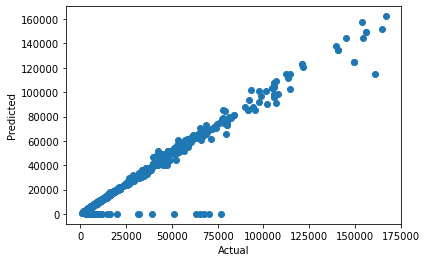

In [284]:
#Visualising the predicted VS actual values
a=np.exp(y_test)  #using exponent function to compare the original values of the price feature(predicted Vs actual) which was transformed using log function
b=np.exp(pred_lr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.scatter(a,b)
plt.show()

RANDOM FOREST REGRESSOR

In [253]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
print("score : ",rfr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_rfr))
print('R.M.S.E:',np.sqrt(mean_squared_error(y_test,pred_rfr)))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_rfr))
print("r2 score: ",r2_score(y_test,pred_rfr))

score :  0.9999964783614999
mean_squared error:  3.520795742311681e-05
R.M.S.E: 0.005933629363477029
mean_absolute_error:  0.0008902485923359216
r2 score:  0.9999697950645248


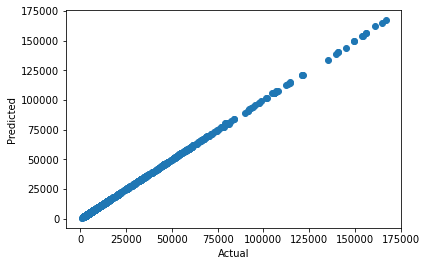

In [278]:
#Visualising the predicted VS actual values
a=np.exp(y_test)  #using exponent function to compare the original values of the price feature(predicted Vs actual) which was transformed using log function
b=np.exp(pred_rfr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.scatter(a,b)
plt.show()

KNEIGHBORS REGRESSOR

In [255]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=3)
knr.fit(X_train_mms,y_train)
pred_knr=knr.predict(X_test_mms)

print("score : ",knr.score(X_train_mms,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_knr))
print('R.M.S.E:',np.sqrt(mean_squared_error(y_test,pred_knr)))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_knr))
print("r2 mmsore: ",r2_score(y_test,pred_knr))

score :  0.9588649714428898
mean_squared error:  0.12970449574319756
R.M.S.E: 0.3601451037334779
mean_absolute_error:  0.17973789290194653
r2 mmsore:  0.88872640699696


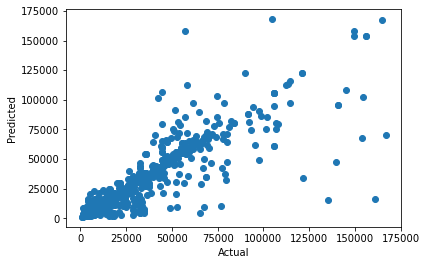

In [279]:
#Visualising the predicted VS actual values
a=np.exp(y_test)  #using exponent function to compare the original values of the price feature(predicted Vs actual) which was transformed using log function
b=np.exp(pred_knr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.scatter(a,b)
plt.show()

SUPPORT VECTOR REGRESSOR

In [257]:
from sklearn.svm import SVR
svc=SVR()
svc.fit(X_train_mms,y_train)
pred_svc=svc.predict(X_test_mms)

print("score : ",svc.score(X_train_mms,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_svc))
print('R.M.S.E:',np.sqrt(mean_squared_error(y_test,pred_svc)))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_svc))
print("r2 score: ",r2_score(y_test,pred_svc))

score :  0.9949742653162437
mean_squared error:  0.011694959711032522
R.M.S.E: 0.10814323701014558
mean_absolute_error:  0.07732743377701307
r2 score:  0.9899668844968265


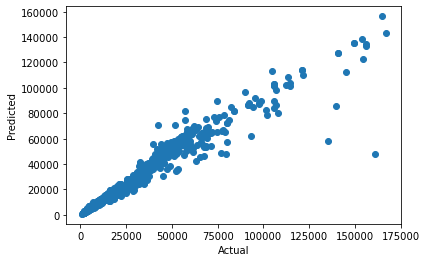

In [280]:
#Visualising the predicted VS actual values
a=np.exp(y_test)  #using exponent function to compare the original values of the price feature(predicted Vs actual) which was transformed using log function
b=np.exp(pred_svc)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.scatter(a,b)
plt.show()

GRADIENT BOOSTING REGRESSOR

In [259]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
pred_gbr=gbr.predict(X_test_mms)

print("score : ",gbr.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_gbr))
print('R.M.S.E:',np.sqrt(mean_squared_error(y_test,pred_gbr)))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_gbr))
print("r2 score: ",r2_score(y_test,pred_gbr))

score :  0.9999532816357484
mean_squared error:  7.40866546588398
R.M.S.E: 2.721886380046746
mean_absolute_error:  2.5015284700081013
r2 score:  -5.355900163851389


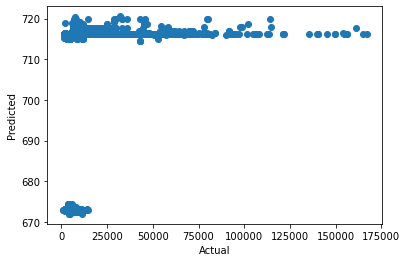

In [281]:
#Visualising the predicted VS actual values
a=np.exp(y_test)  #using exponent function to compare the original values of the price feature(predicted Vs actual) which was transformed using log function
b=np.exp(pred_gbr)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.scatter(a,b)
plt.show()

ADABOOST REGRESSOR

In [261]:
from sklearn.ensemble import AdaBoostRegressor
abc=AdaBoostRegressor()
abc.fit(x_train,y_train)
pred_abc=abc.predict(x_test)
print("score : ",abc.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(y_test,pred_abc))
print('R.M.S.E:',np.sqrt(mean_squared_error(y_test,pred_abc)))
print("mean_absolute_error: ",mean_absolute_error(y_test,pred_abc))
print("r2 score: ",r2_score(y_test,pred_abc))

score :  0.9950437093289188
mean_squared error:  0.005642257161900708
R.M.S.E: 0.07511495964121066
mean_absolute_error:  0.05864323005720215
r2 score:  0.9951595029651488


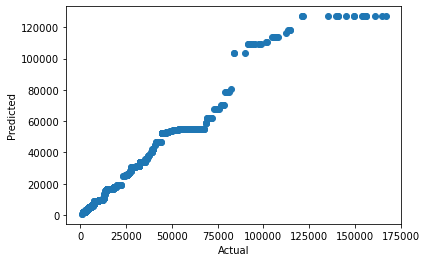

In [283]:
#Visualising the predicted VS actual values
a=np.exp(y_test)  #using exponent function to compare the original values of the price feature(predicted Vs actual) which was transformed using log function
b=np.exp(pred_abc)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.scatter(a,b)
plt.show()

Performing cross-validation

In [263]:
from sklearn.model_selection import cross_val_score

In [264]:
#LinearRegression
cv=cross_val_score(lr,x,y,cv=10)
print("mean score:",cv.mean())
print("cross val score:",cv)

mean score: -1768766435503918.5
cross val score: [-3.66698743e+14 -3.88786215e+14 -5.42578063e+14 -1.47322966e+14
 -1.60864422e+16  9.95924417e-01  9.97058931e-01  9.94445894e-01
 -1.28396841e+12 -1.54552233e+14]


In [265]:
#Random Forest Regressor
cv=cross_val_score(rfr,x,y,cv=10)
print("mean score:",cv.mean())
print("cross val score:",cv)

mean score: 0.9989280536877528
cross val score: [0.99999768 0.99999712 0.9999984  0.98937706 0.99998047 0.99999477
 0.99999621 0.9999915  0.99999677 0.99995057]


In [266]:
#KNeighbors Regressor
cv=cross_val_score(knr,X_test_mms,y_test,cv=10)
print("mean score:",cv.mean())
print("cross val score:",cv)

mean score: 0.8672353948685707
cross val score: [0.88851494 0.87536496 0.88355057 0.87569565 0.86440725 0.81914134
 0.82599164 0.87886788 0.86481893 0.8960008 ]


In [267]:
#SupportVectorRegressor
#cv=cross_val_score(svc,x,y,cv=10)
#print("mean score:",cv.mean())
#print("cross val score:",cv)

In [268]:
#Adaboost Regressor
cv=cross_val_score(abc,x,y,cv=10)
print("mean score:",cv.mean())
print("cross val score:",cv)

mean score: 0.9894444116518688
cross val score: [0.99760007 0.99042323 0.99559433 0.96533453 0.98887585 0.9898699
 0.99081815 0.99538926 0.99381902 0.98671976]


OBSERVATION:

          The Ensemble techniques such as RandomForestClassifier and The AdaBoostRegressor have the best performance in 
          cross-validation and have a cross_val_score identical to the Training aswell as r2_score.

Determining the most important features in determining the price of the flight.

In [269]:
c=list(df_final.columns)
X = df_final.loc[:,c]
X.head()

,month_of_journey,Dep_hour,Dep_min,Days_since_departure,Days_to_journey,stops,arrival_hour,arrival_min,duration_hours,duration_minutes,WEDNESDAY,Friday,SUNDAY,BOM,BOM,DEL,DEL,CPT,CPT,ORD,ORD,MDW,MDW,MIA,MIA,PAT,PAT,BLR,BLR,CCU,CCU,MAA,MAA,AMD,AMD,PNQ,PNQ,YYZ,YYZ,YTZ,YTZ,YKF,YHM,YHM,DEL,DEL,PAT,PAT,BLR,BLR,CCU,CCU,MAA,MAA,AMD,AMD,PNQ,PNQ,CPT,CPT,YYZ,YYZ,YTZ,YTZ,ORD,ORD,MDW,MDW,BOM,BOM,MIA,MIA,YHM,YHM,BOM-DEL,BOM-BDQ-DEL,BOM-AMD-DEL,BOM-IDR-DEL,BOM-UDR-DEL,BOM-JAI-DEL,BOM-IXU-DEL,BOM-IXR-DEL,BOM-BLR-DEL,BOM-HYD-DEL,BOM-MAA-DEL,BOM-GOI-DEL,BOM-JDH-DEL,BOM-VNS-DEL,BOM-DED-DEL,BOM-PAT-DEL,BOM-KQH-DEL,DEL-PAT,DEL-LKO-PAT,DEL-HYD-PAT,DEL-BOM-PAT,DEL-HYD-BLR,DEL-BLR,DEL-PNQ-BLR,DEL-BDQ-BLR,DEL-NAG-BLR,DEL-LKO-BLR,DEL-IXR-BLR,DEL-GAU-BLR,DEL-IXB-BLR,DEL-CCU-BLR,DEL-GOI-BLR,DEL-BOM-BLR,DEL-COK-BLR,DEL-BBI-BLR,DEL-MAA-BLR,DEL-VTZ-BLR,DEL-PAT-BLR,DEL-VGA-BLR,DEL-UDR-BLR,DEL-DXB-BLR,DEL-DBR-BLR,DEL-DOH-BLR,DEL-CCU,DEL-IXB-CCU,DEL-PNQ-CCU,DEL-IMF-CCU,DEL-BLR-CCU,DEL-LKO-CCU,DEL-BBI-CCU,DEL-IXR-CCU,DEL-PAT-CCU,DEL-VNS-CCU,DEL-JAI-CCU,DEL-RPR-CCU,DEL-HYD-CCU,DEL-BOM-CCU,DEL-MAA,DEL-HYD-MAA,DEL-BLR-MAA,DEL-CCU-MAA,DEL-IXR-MAA,DEL-IDR-MAA,DEL-GAU-MAA,DEL-BOM-MAA,DEL-PNQ-MAA,DEL-AMD-MAA,DEL-RPR-MAA,DEL-SAG-MAA,DEL-DOH-MAA,DEL-AMD,DEL-BHO-AMD,DEL-BOM-AMD,DEL-UDR-AMD,DEL-PNQ-AMD,DEL-IXC-AMD,DEL-MAA-AMD,DEL-PNQ,DEL-NAG-PNQ,DEL-IXC-PNQ,DEL-BLR-PNQ,DEL-HYD-PNQ,DEL-IDR-PNQ,DEL-AMD-PNQ,DEL-MAA-PNQ,DEL-JLR-PNQ,DEL-BOM- DXB- ...-CPT,DEL-DOH-CPT,DEL-DXB- DOH- ...-CPT,DEL-DXB-CPT,DEL-DOH- JNB- ...-CPT,DEL-AMS-CPT,DEL-ORD-YYZ,DEL-EWR-YYZ,DEL-LHR-YYZ,DEL-EWR-LGA-YYZ,DEL-DXB-YYZ,DEL-AUH-YYZ,DEL-YVR-YYZ,DEL-YYZ,CPT-LHR-YYZ,CPT-ADD- CDG- ...-YYZ,CPT-IST- CDG- ...-YYZ,CPT-JNB- ZRH- ...-YTZ,CPT-IST- CDG- ...-YTZ,CPT-ADD- LHR- ...-YTZ,CPT-IST-YYZ,CPT-MUC-YYZ,CPT-DOH-YYZ,CPT-JNB- ADD- ...-YYZ,ORD-MIA-YYZ,MDW-YTZ,ORD-YYZ,ORD-YUL-YYZ,ORD-YUL-YTZ,ORD-EWR-YYZ,ORD-IAD-DCA-YYZ,ORD-CLT-YYZ,ORD-PHL-YYZ,ORD-DCA-YYZ,ORD-LGA-YYZ,ORD-DTW-YYZ,MDW-DTW-YYZ,ORD-MSP-YYZ,MDW-ATL-YYZ,ORD-ATL-YYZ,ORD-IAD-YYZ,MDW-MSP-YYZ,ORD-EWR-LGA-YYZ,MIA-YYZ,MIA-IAD-YYZ,MIA-EWR-YYZ,MIA-CLT-YYZ,MIA-ATL-YYZ,MIA-PHL-YYZ,MIA-DCA-YYZ,MIA-LGA-YYZ,MIA-BOS-YTZ,MIA-MCO-YYZ,MIA-YUL-YYZ,MIA-YUL-YTZ,MIA-EWR-LGA-YYZ,MIA-ORD-YYZ,MIA-MSP-YYZ,MIA-DFW-YYZ,MIA-IAH-YYZ,MIA-MEX-YYZ,MIA-ORD,MIA-JFK-ORD,MIA-MCO-ORD,MIA-CLT-ORD,MIA-DCA-ORD,MIA-IAD-ORD,MIA-EWR-ORD,MIA-IAH-ORD,MIA-IAD-DCA-ORD,MIA-ATL-ORD,MIA-ATL-MDW,MIA-LGA-ORD,MIA-RDU-ORD,MIA-EWR-LGA-ORD,MIA-LAS-ORD,MIA-SJU-ORD,MIA-CUN-ORD,MIA-BOS-ORD,MIA-JAX-ORD,MIA-DTW-ORD,MIA-MSP-MDW,MIA-EYW-ORD,BOM-BLR-PNQ,BOM-NAG-PNQ,BOM-DEL-PNQ,BOM-MAA-PNQ,BOM-AMD-PNQ,BOM-PAT-PNQ,BOM-GOI-PNQ,BOM-CCU-PNQ,BOM-AMD,BOM-DEL-AMD,BOM-JAI-AMD,BOM-MAA,BOM-HYD-MAA,BOM-BLR-MAA,BOM-JAI-MAA,BOM-COK-MAA,BOM-IXE-MAA,BOM-CJB-MAA,BOM-DEL-MAA,BOM-AMD-MAA,BOM-GOI-MAA,BOM-BLR,BOM-HYD-BLR,BOM-GOI-BLR,BOM-COK-BLR,BOM-MAA-BLR,BOM-DEL-BLR,BOM-AMD-BLR,BOM-PAT-BLR,BOM-CCU-BLR,PAT-BLR,PAT-CCU-BLR,PAT-HYD-BLR,PAT-IXR-BLR,PAT-BOM-BLR,PAT-DEL-BLR,DEL-BOM,DEL-IDR-BOM,DEL-IXU-BOM,DEL-JDH-BOM,DEL-AMD-BOM,DEL-JAI-BOM,DEL-MAA-BOM,DEL-BLR-BOM,DEL-HYD-BOM,DEL-BHO-BOM,DEL-UDR-BOM,DEL-LKO-BOM,DEL-VNS-BOM,DEL-CCU-BOM,DEL-BBI-BOM,DEL-GOI-BOM,DEL-PAT-BOM,DEL-IXR-BOM,DEL-IXC-BOM,DEL-ATQ-BOM,DEL-DXB-BOM,DEL-DBR-BOM,DEL-SXR-BOM,PAT-DEL,PAT-LKO-DEL,PAT-CCU-DEL,PAT-HYD-DEL,PAT-BOM-DEL,PAT-BLR-DEL,PAT-MAA-DEL,BLR-HYD-DEL,BLR-PNQ-DEL,BLR-DEL,BLR-IXR-DEL,BLR-BOM-DEL,BLR-GAU-DEL,BLR-IXB-DEL,BLR-CCU-DEL,BLR-GOI-DEL,BLR-VTZ-DEL,BLR-PAT-DEL,BLR-UDR-DEL,BLR-JLR-DEL,BLR-LKO-DEL,BLR-BBI-DEL,BLR-MAA-DEL,BLR-STV-DEL,BLR-COK-DEL,BLR-AMD-DEL,BLR-IXC-DEL,BLR-DXB-DEL,BLR-DBR-DEL,BLR-DOH-DEL,CCU-DEL,CCU-IXB-DEL,CCU-IMF-DEL,CCU-BLR-DEL,CCU-IXR-DEL,CCU-LKO-DEL,CCU-BBI-DEL,CCU-VNS-DEL,CCU-RPR-DEL,CCU-JAI-DEL,CCU-GAU-DEL,CCU-JRG-DEL,CCU-BOM-DEL,CCU-AMD-DEL,CCU-MAA-DEL,MAA-DEL,MAA-HYD-DEL,MAA-CCU-DEL,MAA-BLR-DEL,MAA-BOM-DEL,MAA-RPR-DEL,MAA-LKO-DEL,MAA-PNQ-DEL,MAA-CMB-DEL,MAA-DOH-DEL,AMD-DEL,AMD-BOM-DEL,AMD-LKO-DEL,AMD-HYD-DEL,AMD-PNQ-DEL,AMD-BLR-DEL,AMD-CCU-DEL,AMD-GOI-DEL,PNQ-DEL,PNQ-BLR-DEL,PNQ-AMD-DEL,PNQ-HYD-DEL,PNQ-MAA-DEL,PNQ-IDR-DEL,PNQ-CCU-DEL

In [288]:
Y=np.exp(y)
Y.head()

0    1865.0
1    1865.0
2    1865.0
3    1865.0
4    1865.0
Name: Price, dtype: float64

In [290]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, Y)

ExtraTreesRegressor()

In [291]:
print(selection.feature_importances_)

[7.37481062e-04 1.56902116e-04 6.16381938e-05 5.24244936e-02
 2.77775210e-04 4.23719856e-02 2.15984791e-03 1.63550218e-05
 7.75256427e-01 2.17977726e-05 8.06234964e-04 2.68908923e-05
 9.30677937e-05 9.49132666e-08 1.57906142e-11 3.40938501e-07
 1.27734812e-07 9.17324561e-07 4.17898934e-06 5.52696629e-07
 5.05763344e-08 2.88147742e-02 4.85535317e-07 1.68455962e-03
 2.69190423e-05 1.01473520e-07 5.21881841e-07 1.41716672e-08
 1.35368596e-07 6.23788188e-05 4.41282521e-08 3.52919974e-05
 2.59708756e-02 1.80182076e-07 4.30574304e-04 7.46435498e-08
 3.04000013e-07 6.20644638e-11 8.25732319e-05 8.87514962e-12
 6.08247251e-06 7.30996043e-06 9.61880250e-04 1.47299232e-03
 4.60593424e-07 9.78014060e-08 5.36695670e-08 5.65543748e-07
 4.06021203e-08 4.54436536e-07 9.74098318e-05 2.14447179e-08
 7.04039808e-05 1.39313030e-02 4.17873409e-07 2.11578574e-04
 1.50485169e-07 1.60483128e-07 2.04645238e-05 4.72388974e-08
 4.95277722e-10 5.77000430e-05 1.94949714e-11 1.23632017e-05
 4.68699827e-07 1.247450

Visualising the features along with their respective contributions in the success of the model.

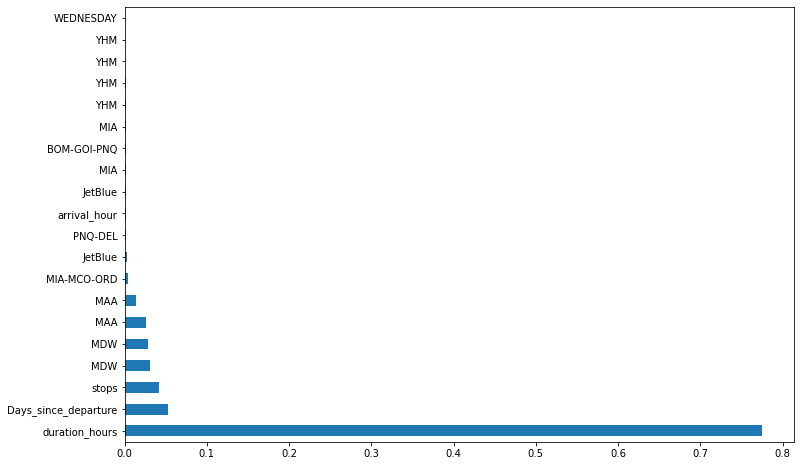

In [292]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()


OBSERVATION:
    The 'Duration_hours' feature played the most significant role in determining the price of the flights followed by the 'Stops'(no. of stops) feature and the 'Days_since_departure' (number of days taken to reach destination) feature.


HyperParamter Tuning the RandomForestClassifier

In [295]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [296]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10,None]


In [297]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [299]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2)

In [300]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=  42.6s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=  41.9s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=  38.5s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=  43.8s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=500; total time=  41.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=300; total time=  31.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_estimators=300; total time=  30.7s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=5, min_samples_split=15, n_e

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10, None],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [301]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

In [304]:
predictions=np.exp(rf_random.predict(x_test))

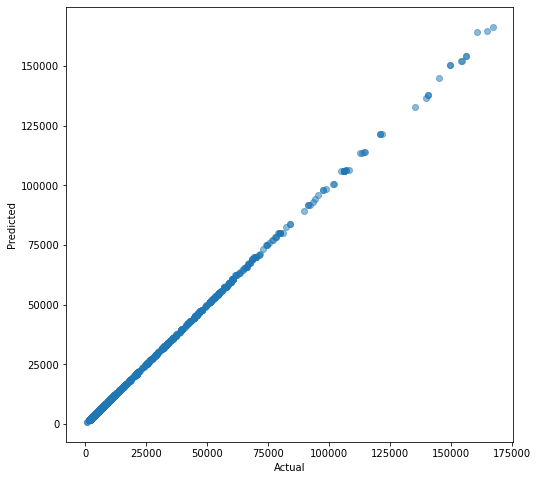

In [306]:
plt.figure(figsize = (8,8))
plt.scatter(np.exp(y_test), predictions, alpha = 0.5)#Reversed the log transformation by using"np.exp" to get the real values
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()

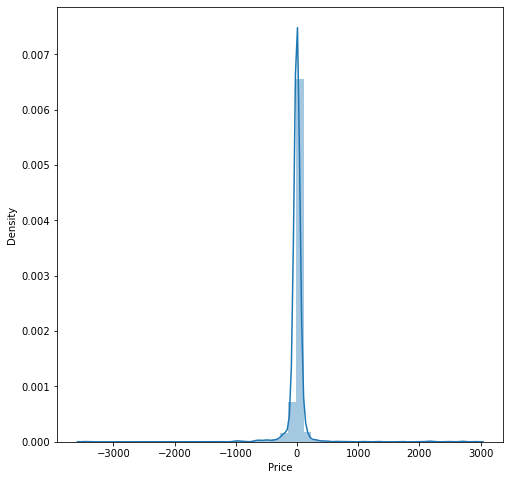

In [309]:
plt.figure(figsize = (8,8))
sns.distplot(np.exp(y_test)-predictions)
plt.show()


Tuning our RandomForest model with the best parameters in order to enhance model performance.
'n_estimators': 100,
 'min_samples_split': 15,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 20}

The actual and the predicted values were inverse transformed using np.exp() function to get the real values and the errors.

In [319]:
#Tuned Random Forest Model 
best_model=RandomForestRegressor(min_samples_split=15,min_samples_leaf=2,max_features='auto',max_depth=20)
best_model.fit(x_train,y_train)
pred_best_model=best_model.predict(x_test)
print("score : ",best_model.score(x_train,y_train))
print("mean_squared error: ",mean_squared_error(np.exp(y_test),np.exp(pred_best_model)))
print('R.M.S.E:',np.sqrt(mean_squared_error(np.exp(y_test),np.exp(pred_best_model))))
print("mean_absolute_error: ",mean_absolute_error(np.exp(y_test),np.exp(pred_best_model)))
print("r2 score: ",r2_score(np.exp(y_test),np.exp(pred_best_model)))

score :  0.9999827276442391
mean_squared error:  34953.13881360587
R.M.S.E: 186.9575856006005
mean_absolute_error:  43.92447902048053
r2 score:  0.9999339276746959


Saving our model using pickle library to be reused again.

In [324]:
import pickle
filename='flight_price2_rfr.pkl'
pickle.dump(rfr,open(filename,'wb'))

Reloading the model for testing

In [326]:

load_model=pickle.load(open(filename,'rb'))
result=load_model.score(x_train,y_train)
result

0.9999964783614999

In [328]:
y_prediction = load_model.predict(x_test)

In [331]:
r2_score(np.exp(y_test), np.exp(y_prediction))

0.9999832052936041

END OF WORKSHEET